# Linear Regression Model

@copyright : Shahina Rahman, Trevor Harris, and Scott Bruce

In [2]:
import numpy as np
import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt
# plots.style.use('fivethirtyeight')

import IPython.display

# Building models

To build statistical / ML models we need three things

1. Data -- $X$ and $Y$, observed as $(x_1, y_1),...,(x_n, y_n)$
2. Model family $\mathcal{F}$ -- Possible relationships between $X$ and $Y$
3. Loss function $\mathcal{L}$  -- Finds the best model

We assume there exists a relationship of the form
$$
Y = f(X) + \epsilon
$$


The first class of models we will encounter is the __linear model__

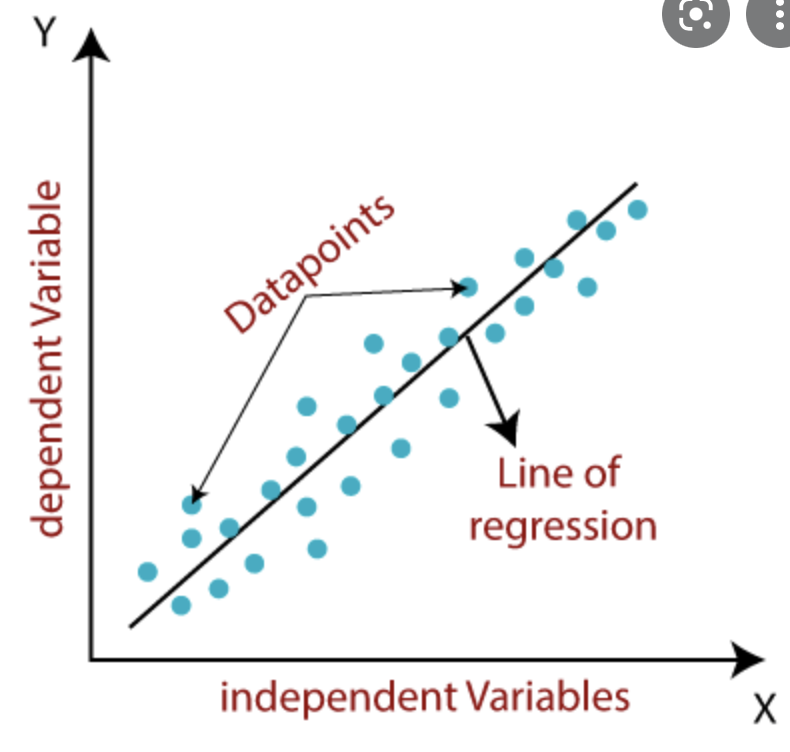

In [3]:
IPython.display.Image('Linear-Regression.png', width = 400)

A linear regression model using the predictor $X_i$ is :

$$ f(X_i) = \beta_0 + \beta_1 X_i $$

We assume that the deterministic relationship is just a line
 - $\beta_0$ is the __intercept__
 - $\beta_1$ is the __slope__

We will use $f(X_i)$ to predict $Y_i$ for each $i = 1,...,n$. So, the model for $Y$ is:

$$Y = f(X) + \epsilon = \beta_0 + \beta_1 X + \epsilon $$.


$\epsilon_i = Y_i - f(X_i)$ = Residual Error for $i^{th}$ observation.


### Optimal value of intercept and slope from the data is:

Linear regression specifies a specific model family (all linear functions)
$$\mathcal{F} = \{ f(x) = \beta_0 + \beta_1 x \}$$

We need a loss function to find the optimal values of the intercept and slope paramaters $\beta_0, \beta_1$

Use the mean squared error loss (MSE)
 1. Easy -- MSE is differentiable, so its simple to minimize
 2. Unique -- MSE has a unique minimizer for $\beta_0$, $\beta_1$. I.e. there is only 1 best fitting line
 3. Interpretable -- Resulting function $f(x) = \hat{\beta}_0 + \hat{\beta}_1 x$ approximates the mean of $Y \mid X$


Reminder: minimizing the loss $\mathcal{L}$ is trying to find the best fitting member from $\mathcal{F}$

$$ \hat{f} = \arg\min_{f \in \mathcal{F}} \mathcal{L}(f, (x, y))$$

Linear models with MSE
$$\hat{\beta_0}, \hat{\beta_1} = \arg\min_{\beta_0, \beta_1 \in \mathbb{R}} \frac{1}{n} \sum_{i = 1}^n (y_i - \beta_0 - \beta_1 x_i)^2$$



Stated another way...

The optimal value for intercept and slope paramaters $\beta_0, \beta_1$ are the one that minimizes the following `training MSE`.

* So we define the square error loss function, J as :

$J(\beta_0, \beta_1) = \frac{1}{n}\sum_{i=1}^n \epsilon_i^2$  = MSE = Mean squared Error = $\frac{1}{n}\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i )^2$

**Minimizing $J(\beta_0, \beta_1)$ wrt  $\beta_0, \beta_1$ will lead to the following equation**

$$\frac{\partial J(\beta_0, \beta_1)}{\partial \beta_0} = 0 $$
and

$$\frac{\partial J(\beta_0, \beta_1)}{\partial \beta_1} = 0 $$


#### Solve the equation to find the optimal values of the parameters.

Derivation at home!


Solution (after some manipulation)

$$
\beta_1 = \frac{cov(x, y)}{var(x)} = cor(x, y) \frac{sd(y)}{sd(x)}
$$

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

#### But why bother?

In a mathematical statistics class you should derive these and study the solutions in depth
 - Manually finding optima is very informative for understanding
 - Explict equations mean you can instantly find the solution

On the other hand...
 - Linear regression with MSE loss is a special case
 - It happens to have a unique minimizer that can be found by hand
 - Most cases, i.e. non-linear regression or special loss funtions, are not solvable by hand


#### Iterative methods

Here we just need solutions
 - As long as we can differentiate the loss function we can quickly optimize it.
 - No need to find the solution by hand.
 - How do these work? Doesn't matter right now.

__Use python to find optima__

In [4]:
## numerical minimization
from scipy.optimize import minimize

# define data
# np.random.seed(0)
beta = [-1, 2]
x = np.random.normal(1, 1, 500)
y = beta[0] + beta[1] * x + np.random.standard_normal(500)


# define loss
def linear_mse(beta):
  return np.mean((y - beta[0] - beta[1] * x)**2)

# minimize loss
beta_hat = minimize(linear_mse, [1, 1]).x
print('True coef', beta)
print('Est. coef', beta_hat)

True coef [-1, 2]
Est. coef [-1.08913278  2.01838381]


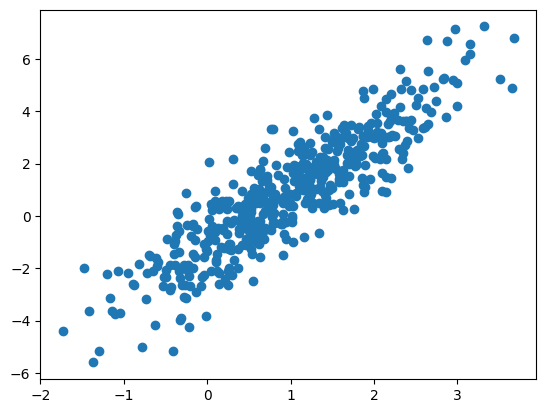

In [5]:
plt.scatter(x, y)

**Exercise: define helper functions :**

* sample_corr(x,y)
* slope(x,y)
* intercept(x,y)
* predict(x,y)
* mse_linear(x,y)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [7]:
def standard_units(arr):
    return (arr - np.mean(arr))/np.std(arr)
def sample_corr(x,y):
            corr = (np.sum(x*y) - len(x)*np.mean(x)*np.mean(y))
            corr = corr/(len(x)*np.std(x)*np.std(y))
            return corr

# Data example :

* Read the following data :  `district_demographics2016.csv`
* Look at two variables: `Median income` vs `College%`
* Which one will you take as a predictor and which one as variable that you can predict ?
* Display the data using scatter plot.
* Any relationship between these two variables ?
* Any correlation ?
* Divide the data with `80% train` and `20% test`
* Use 80% training data to find the `optimal linear model`.
* Plot the data and the display the optimal linear model on top of it.
* Calculate the estimated `training MSE`
* Calculate the estimated `testing MSE`
* Is Linear model a valid model here ? Diagnostic/Residual plot

In [8]:
data = pd.read_csv('district_demographics2016.csv')
data.head()

,State,District,Median Income,Percent voting for Clinton,College%
0,Alabama,"Congressional District 1 (115th Congress), Ala...",47083,34.1,24.0
1,Alabama,"Congressional District 2 (115th Congress), Ala...",42035,33.0,21.8
2,Alabama,"Congressional District 3 (115th Congress), Ala...",46544,32.3,22.8
3,Alabama,"Congressional District 4 (115th Congress), Ala...",41110,17.4,17.0
4,Alabama,"Congressional District 5 (115th Congress), Ala...",51690,31.3,30.3


In [9]:
X = data['College%']
Y = data['Median Income']

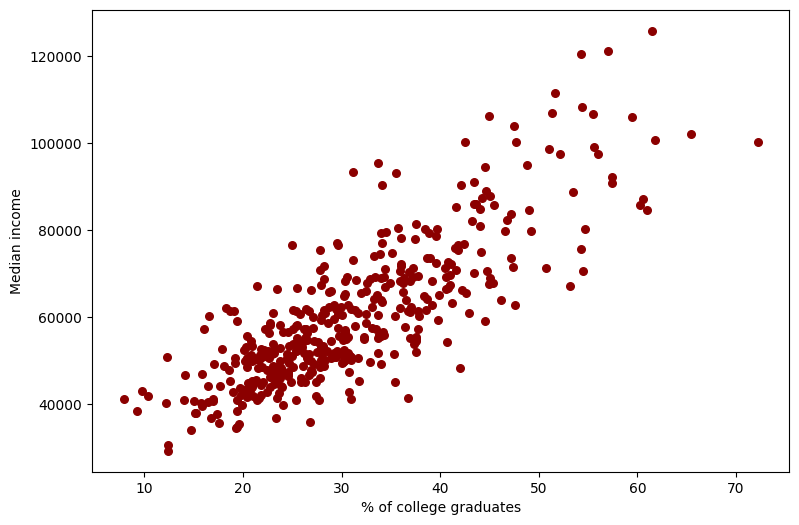

In [10]:
plt.figure(figsize = (9, 6))
plt.scatter(X, Y, color = 'darkred', s = 30);
plt.xlabel('% of college graduates');
plt.ylabel('Median income');

In [11]:
sample_corr(X, Y)

np.float64(0.8184648517141341)

The scatter plot and the sample correlation shows that .............

### Dividing the data into training and testing parts.

In [12]:
n = data.shape[0]

In [13]:
data.shape

(435, 5)

In [14]:
# random.seed(0)
train_index = random.sample(range(n), round(n*0.8))
test_index  = list(set(range(n))^set(train_index)) ## A - B

train_index[0:5]

[74, 88, 278, 105, 217]

In [15]:
train_index[0:5]

[74, 88, 278, 105, 217]

#### Check if these two sets intersects or not

In [16]:
set(train_index)&set(test_index)

set()

In [17]:
n_train = len(train_index)
n_test  = len(test_index)
X_train = X[train_index]
X_test  = X[test_index]
Y_train = Y[train_index]
Y_test  = Y[test_index]

In [18]:
X_train.shape, Y_train.shape

((348,), (348,))

In [19]:
X_test.shape, Y_test.shape

((87,), (87,))

## Estimating the best fit line

1. Manual solution
2. Iterative solution

In [20]:
## manual solution
def slope(x, y):
    r = sample_corr(x,y)
    y_sd = np.std(y)
    x_sd = np.std(x)
    return r * y_sd / x_sd

def intercept(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return y_mean - slope(x, y)*x_mean

beta0 = intercept(X_train, Y_train)
beta1 = slope(X_train, Y_train)
beta_exact = [beta0, beta1]
beta_exact

[np.float64(21050.925777395212), np.float64(1256.257398182581)]

In [21]:
## Iterative solution

# define loss
def linear_mse(beta, x, y):
  return np.mean((y - beta[0] - beta[1] * x)**2)

# minimize loss
beta_approx = minimize(linear_mse, [1, 1], args = (X_train, Y_train)).x
beta_approx

array([21050.8874185 ,  1256.25892518])

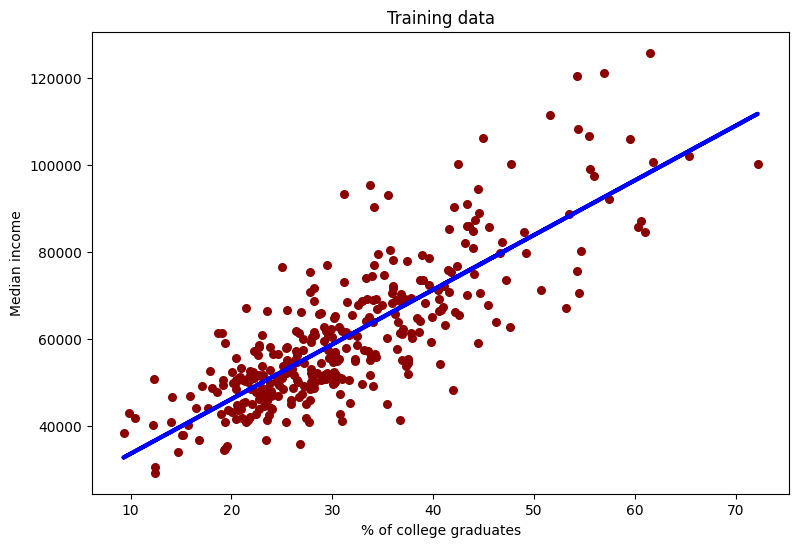

In [22]:
def predict(beta, x_new):
    """Return an array of the regressions prediction at all the x values"""
    return beta[0] + beta[1] * x_new

x_set  =  np.arange(10, 80, 20)
y_pred =  predict(beta_exact, X_train)


plt.figure(figsize = (9, 6))
plt.scatter(X_train, Y_train, color = 'darkred', s = 30);
plt.plot(X_train, y_pred, color = 'blue', linewidth = 3);
plt.xlabel('% of college graduates');
plt.ylabel('Median income');
plt.title('Training data');

In [23]:
### training MSE
linear_mse(beta_exact, X_train, Y_train), linear_mse(beta_approx, X_train, Y_train)

(np.float64(92496067.47221732), np.float64(92496067.47256468))

In [24]:
### testing MSE
linear_mse(beta_exact, X_test, Y_test), linear_mse(beta_approx, X_test, Y_test)

(np.float64(71987704.11975448), np.float64(71987662.20591937))

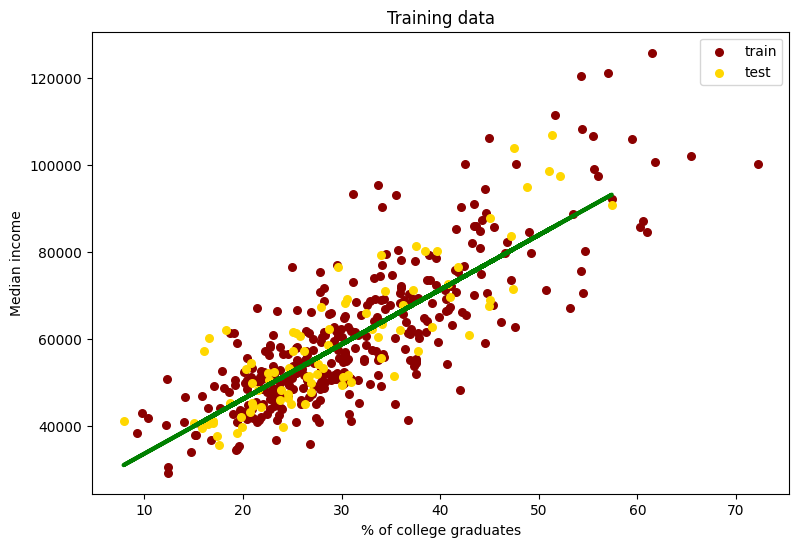

In [25]:
y_pred_test = predict(beta_exact, X_test)


plt.figure(figsize = (9, 6))
plt.scatter(X_train, Y_train, color = 'darkred', s = 30, label = "train");
plt.scatter(X_test, Y_test, color = 'gold', s = 30, label = 'test');
plt.plot(X_test, y_pred_test, color = 'green', linewidth = 3);
plt.xlabel('% of college graduates');
plt.ylabel('Median income');
plt.title('Training data');
plt.legend();

## Assumptions of Linear Regression model :

Linear models are valid for statistical inference if :

* Errors are independent and Gaussian  (No correlation among the errors)
* Residuals are centered at 0. **E(error) = 0**
* Residuals have constant variance  **V(error) = constant**
* There are not many outliers.

**Diagnostic plot/ Residual Plots are useful to check the validity of a Linear Model**

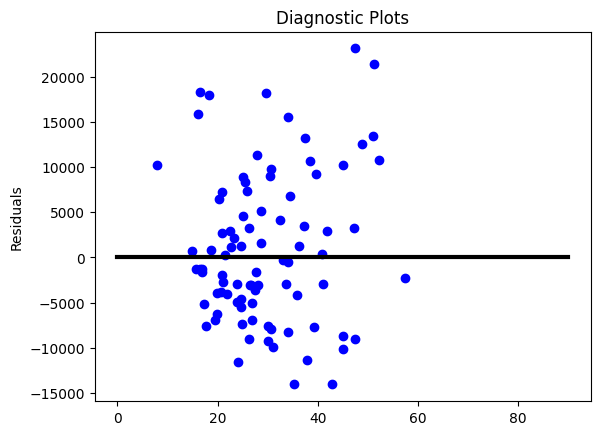

In [26]:
y_pred    =  predict(beta_exact, X_test)
residuals = Y_test - y_pred
plt.scatter(X_test,residuals, color = 'b');
plt.plot([0,50,90], [0,0,0], color = "black", linewidth = 3);
plt.ylabel('Residuals');
plt.title('Diagnostic Plots');

### Assumptions redux

Why do we care about these assumptions?

- We're trying to justify that the residuals are independent and identically distribution (iid) Normal
- With 0 mean and constant variance

These assumptions are necessary for inference on $\beta_0$ and $\beta_1$
 - I.e. are they significantly different from 0?
 - These assumptions allow us the calculate standard errors for the coefficients

__These assumptions are not necessary for prediction__
 - We care about minimizing test error
 - You can still do a good job even your model is not correct


__All we really need to assume__
1. The data are a representative sample of the population
2. The relationship is (approximately) linear

## Another example (income vs voting preference)

In [27]:
data.head()

,State,District,Median Income,Percent voting for Clinton,College%
0,Alabama,"Congressional District 1 (115th Congress), Ala...",47083,34.1,24.0
1,Alabama,"Congressional District 2 (115th Congress), Ala...",42035,33.0,21.8
2,Alabama,"Congressional District 3 (115th Congress), Ala...",46544,32.3,22.8
3,Alabama,"Congressional District 4 (115th Congress), Ala...",41110,17.4,17.0
4,Alabama,"Congressional District 5 (115th Congress), Ala...",51690,31.3,30.3


In [28]:
X = data['Median Income']
Y = data['Percent voting for Clinton']

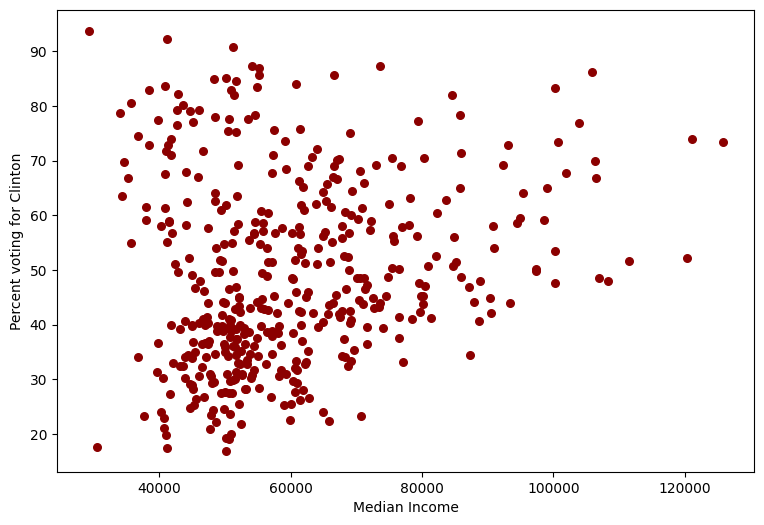

In [29]:
plt.figure(figsize = (9, 6))
plt.scatter(X, Y, color = 'darkred', s = 30);
plt.xlabel('Median Income');
plt.ylabel('Percent voting for Clinton');

In [30]:
# np.random.seed(0)
random.seed(0)
train_index = random.sample(range(n), round(n*0.8))
test_index  = list(set(range(n))^set(train_index)) ## A - B

n_train = len(train_index)
n_test  = len(test_index)
X_train = X[train_index]
X_test  = X[test_index]
Y_train = Y[train_index]
Y_test  = Y[test_index]

In [31]:
## Iterative solution

# define loss
def linear_mse(beta, x, y):
  return np.mean((y - beta[0] - beta[1] * x)**2)

# minimize loss
beta_approx = minimize(linear_mse, [1, 1], args = (X_train, Y_train)).x
beta_approx

array([3.61286901e+01, 2.09915557e-04])

In [32]:
beta_approx[1]

np.float64(0.0002099155573481927)

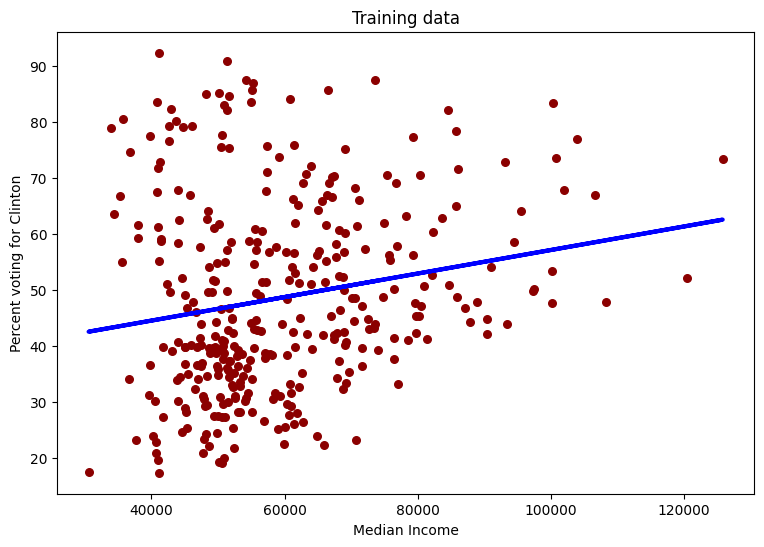

In [33]:
y_pred =  predict(beta_approx, X_train)

plt.figure(figsize = (9, 6))
plt.scatter(X_train, Y_train, color = 'darkred', s = 30);
plt.plot(X_train, y_pred, color = 'blue', linewidth = 3);
plt.xlabel('Median Income');
plt.ylabel('Percent voting for Clinton');
plt.title('Training data');

In [34]:
def predict(beta, x_new):
    """Return an array of the regressions prediction at all the x values"""
    return beta[0] + beta[1] * x_new

7.511824280356251e-07


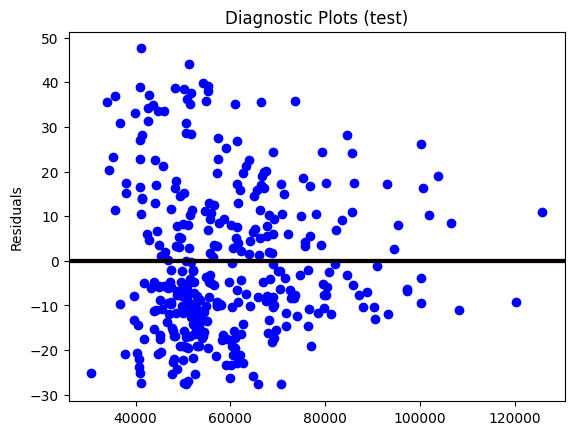

In [35]:
y_pred    =  predict(beta_approx, X_train)
residuals = Y_train - y_pred
plt.scatter(X_train, residuals, color = 'b');
plt.axhline(np.mean(residuals), color = "red", linewidth = 3);
plt.axhline(0, color = "black", linewidth = 3);
plt.ylabel('Residuals');
plt.title('Diagnostic Plots (test)');
print(np.mean(residuals))

(array([30., 50., 90., 42., 41., 39., 21., 12., 21.,  2.]),
 array([-27.68294467, -20.16033512, -12.63772558,  -5.11511604,
          2.4074935 ,   9.93010305,  17.45271259,  24.97532213,
         32.49793168,  40.02054122,  47.54315076]),
 <BarContainer object of 10 artists>)

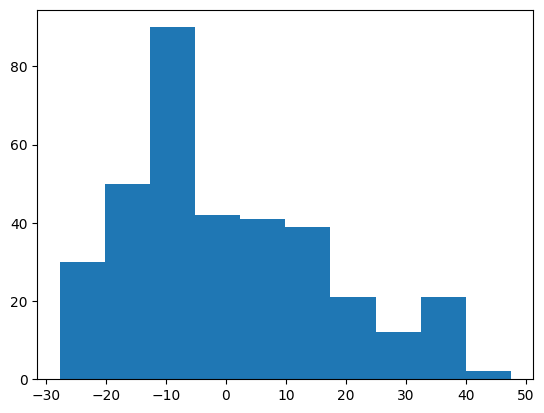

In [36]:
plt.hist(residuals)

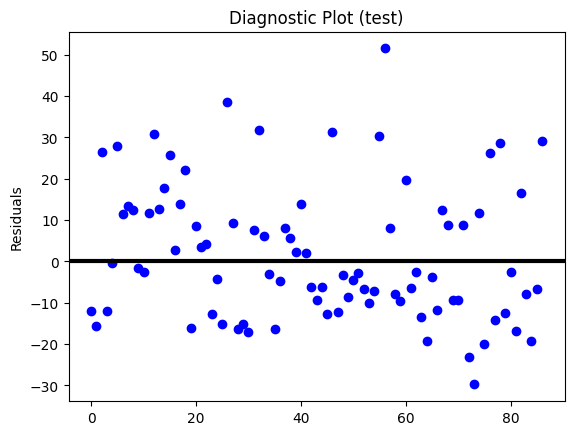

In [37]:
y_pred    =  predict(beta_approx, X_test)
residuals = Y_test - y_pred
plt.scatter(np.arange(n_test),residuals, color = 'b');
plt.axhline(0, color = "black", linewidth = 3);
plt.ylabel('Residuals');
plt.title('Diagnostic Plot (test)');

## Linear doesnt mean the scatter plot is a line

Linear means we can add up a weighted combination of the predictors to get the target

$$ f(X) = \beta_0 + \beta_1 X $$

But this is equally valid if we transform $X$. Here are some linear regressions

1. $ f(X) = \beta_0 + \beta_1 e^{-X} $
2. $ f(X) = \beta_0 + \beta_1 \sin(\pi X) $
3. $ f(X) = \beta_0 + \beta_1 |X| $


In [38]:
import math

x = np.linspace(-2, 2, 100)

np.random.seed(0)

y1 = 0.5 + 2 * np.exp(-x) + np.random.normal(0, 1, 100)
y2 = 0.5 + 2 * np.sin(math.pi * x) + np.random.normal(0, 1, 100)
y3 = 0.5 + 2 * np.abs(x) + np.random.normal(0, 1, 100)

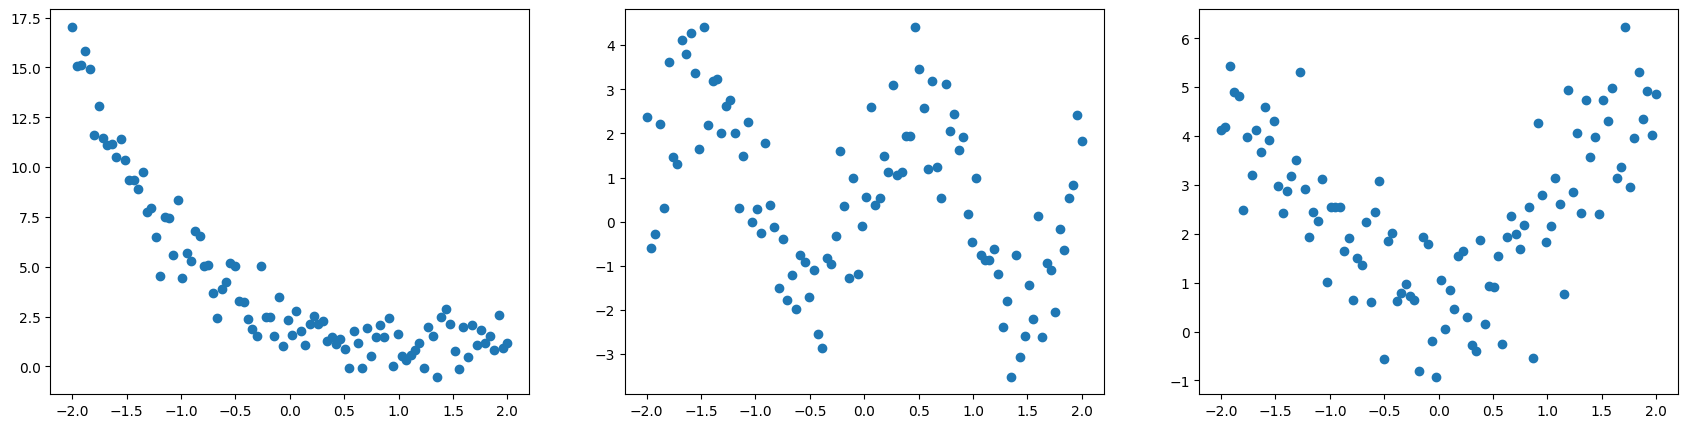

In [39]:
fig, ax = plt.subplots(1, 3, figsize = (21, 5))

ax[0].scatter(x, y1)
ax[1].scatter(x, y2)
ax[2].scatter(x, y3)

In [40]:
# define loss
def linear_mse(beta, x, y):
  return np.mean((y - beta[0] - beta[1] * x)**2)

# minimize loss
beta1 = minimize(linear_mse, [1, 1], args = (np.exp(-x), y1)).x
beta2 = minimize(linear_mse, [1, 1], args = (np.sin(math.pi * x), y2)).x
beta3 = minimize(linear_mse, [1, 1], args = (np.abs(x), y3)).x

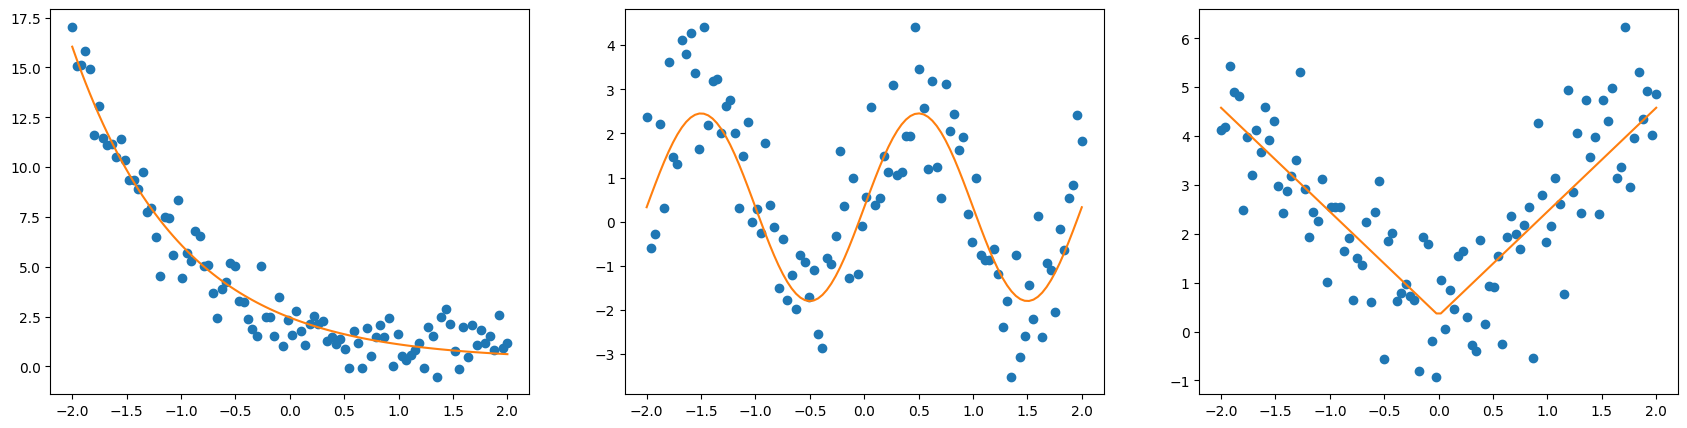

In [41]:
fig, ax = plt.subplots(1, 3, figsize = (21, 5))

ax[0].scatter(x, y1)
ax[0].plot(x, predict(beta1, np.exp(-x)), c = 'C1')

ax[1].scatter(x, y2)
ax[1].plot(x, predict(beta1, np.sin(math.pi * x)), c = 'C1')

ax[2].scatter(x, y3)
ax[2].plot(x, predict(beta1, np.abs(x)), c = 'C1')

Given the right transformation, almost any relationship can be expressed as a linear regression
- The scatter plot is linear in the transformed space

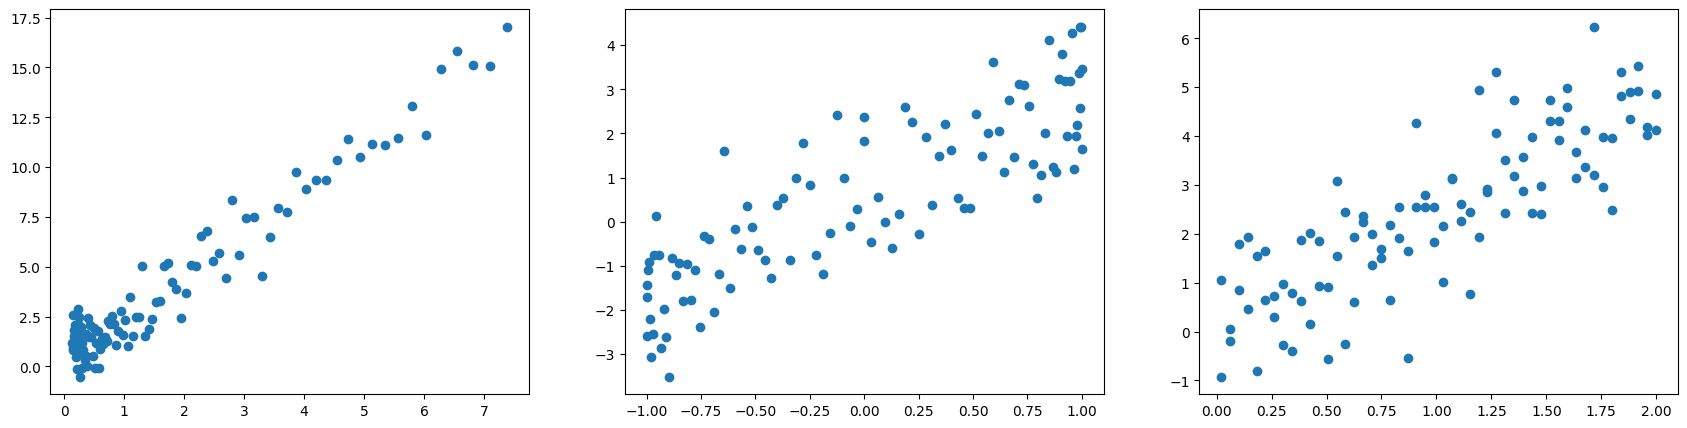

In [42]:
fig, ax = plt.subplots(1, 3, figsize = (21, 5))

ax[0].scatter(np.exp(-x), y1)
ax[1].scatter(np.sin(math.pi * x), y2)
ax[2].scatter(np.abs(x), y3)

- Finding the right transformation is not easy
- Feature engineering

More complex methods will engineer features for you

# Linear regression in `sci-kit learn`

Lets use even more software to fit linear models

sci-kit learn, aka `sklearn` is massive library of machine learning methods and tools
- Consisent easy to use "interface" for each model
- Usually reliable...usually

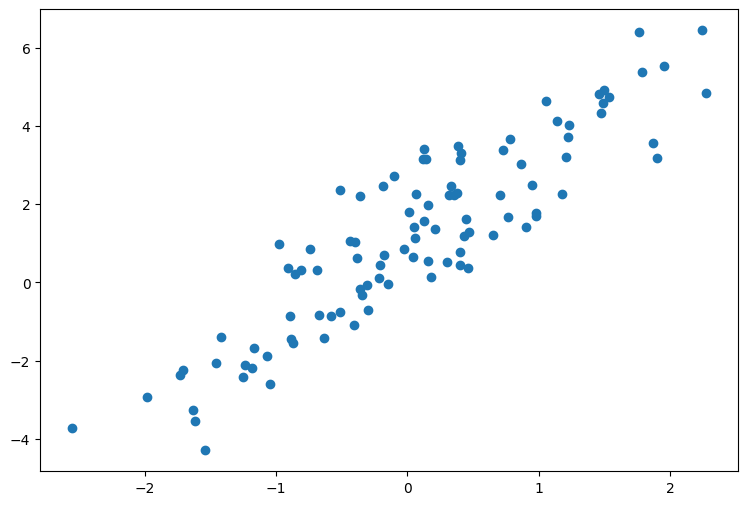

In [43]:
np.random.seed(0)

x_train = np.random.normal(0, 1, 100)
y_train = 1 + 2 * x_train + np.random.normal(0, 1, 100)

plt.figure(figsize = (9, 6))
plt.scatter(x_train, y_train)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
# create a "linear regression" object
lm = LinearRegression()

### Training

Once we have created our model object we can use it to train on our data

We do this by calling `lm.fit(x_train, y_train)`

However, we have to be careful that `x_train` and `y_train` are formatted as sklearn expects
- `x_train` is a 2D array. Each row is an observation and each column is a feature.
- `y_train` is a 1D array.

In [46]:
# so for example we need to reshape our data x
x_train.shape

(100,)

In [47]:
# now its in the correct format
x_train = x_train.reshape(-1, 1)
x_train.shape, y_train.shape

((100, 1), (100,))

In [48]:
# this is all we need to do. ez.
lm.fit(x_train, y_train)

LinearRegression()

Now that we fit it, what else can we do?

Lets check the documentation!!

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


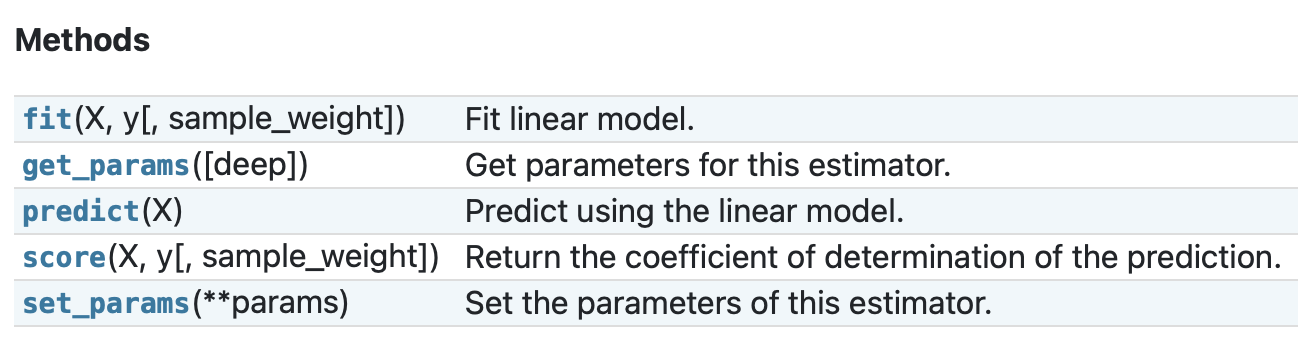

In [49]:
IPython.display.Image('sklearn_regression.png', width = 800)

### Predictions

We already used the `fit` method to train our model on the data

Now lets use the `predict` method to predict some new data

In [50]:
x_test = np.random.normal(0, 1, 100)
y_test = 1 + 2 * x_test + np.random.normal(0, 1, 100)

x_test = x_test.reshape(-1, 1)
yhat_test = lm.predict(x_test)

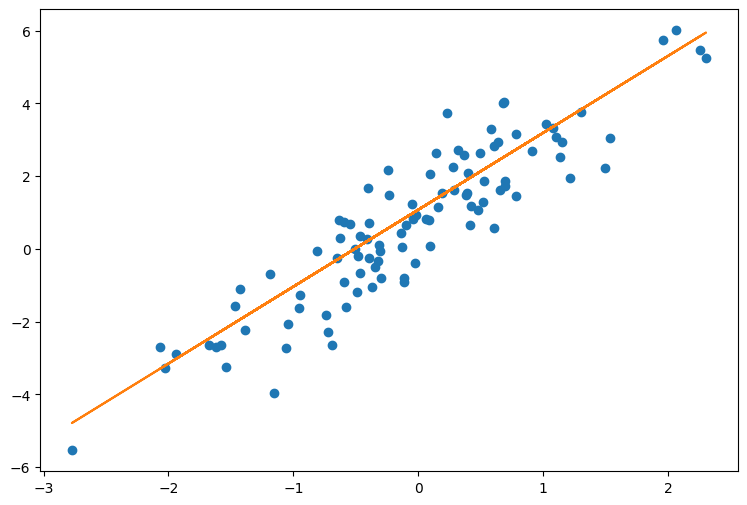

In [51]:
plt.figure(figsize = (9, 6))
plt.scatter(x_test, y_test)
plt.plot(x_test, yhat_test, c = 'C1')

In [52]:
lm.intercept_

np.float64(1.0751530850525144)

### Scoring

So far we have used MSE to measure our models error. And we can keep doing that.

In [53]:
mse_test = np.mean((y_test - yhat_test)**2)
mse_test

np.float64(0.9202393670301818)

In [54]:
# can also check training mse if you'd like
yhat_train = lm.predict(x_train)
mse_train = np.mean((y_train - yhat_train)**2)
mse_train

np.float64(1.057171854190629)

We notice that our `lm` object also has a method called `score`

Scoring a model is another way of saying to measure its performance or measure its loss
 - There are many, many "scoring rules"
 - All are designed to measure some aspect of a model's skill
 - Most of them are not good
 - Should only use scoring rules that are "proper"

###  $R^2$ statistic (coefficient of determination)

$R^2$ is the proportion of variance explained
- Between 0 and 1 (for linear models fit with MSE)
- Independent of the scale of Y .

$$ R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

RSS = $\sum(y_i - \hat y)^2$ - residual sum of squares (MSE of your model)

TSS = $\sum(y_i - \bar y)^2$ - total of sum of squares (MSE of the mean)

$R^2$ measures the proportion of variability in Y that can be explained using X = $(X_1 , ..., X_p)$.

An $R^2$ statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. A number near 0 indicates that the regression did not explain much of the variability in the response; this might occur because the linear model is wrong, or the inherent error σ2 is high, or both.

In [55]:
lm.score(x_test, y_test)

0.8136011168587756

In [56]:
lm.score(x_train, y_train)

0.8112158448777356

__Note 1.__ Its called $R^2$ because in a simple linear regression (one feature) its equal to the correlation (r) squared.

In [57]:
np.corrcoef(x_train.flatten(), y_train)[1, 0]**2

np.float64(0.8112158448777359)

__Note 2.__ Despite what you've been told $R^2$ can be negative. Look at the formula

$$ R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

RSS = $\sum(y_i - \hat y)^2$ - residual sum of squares (MSE of your model)

TSS = $\sum(y_i - \bar y)^2$ - total of sum of squares (MSE of the mean)

__IF__ your model's predictions are __worse than the mean__ then you will have a negative $R^2$. This can't happen in linear regression if you minimize MSE, but could happen in general


R^2 =  -0.52003576512537



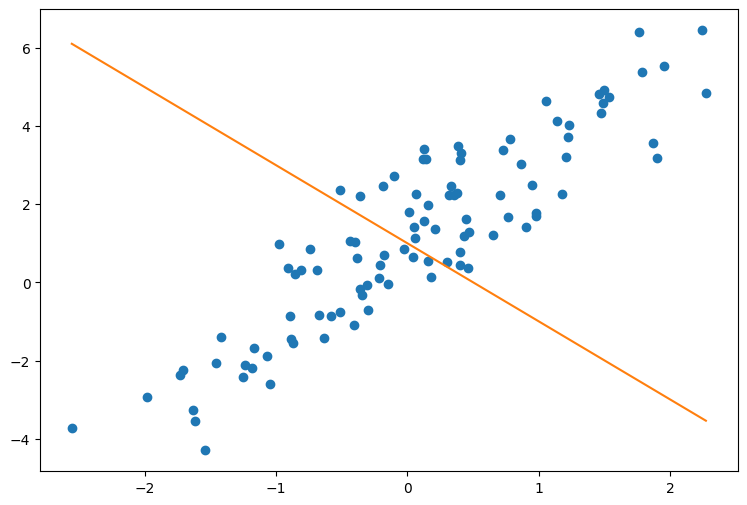

In [58]:
# contrived example
np.random.seed(0)

x = np.random.normal(0, 1, 100)
y = 1 + 2 * x + np.random.normal(0, 1, 100)

# a terrible model
yhat = 1 - 2 * np.sort(x)

# bigly negative R^2
print('R^2 = ', 1 - (np.mean((y - yhat)**2) / np.mean((y - np.mean(y))**2)))
print('')

# plot
plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(np.sort(x), yhat, c = 'C1')
plt.show()

# Multiple Linear Regression

Lets extend the linear regression case to the case where we have $p$ variables that we want to use to predict $Y$
 - More information is better!

So the model for $Y$ is

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon $$

This is simply a linear regression model with more than one predictor

## As Statistical Learning

Multiple linear regression is again another way to specify a model family

$$\mathcal{F} = \{ f(x) = \beta_0 + \beta_1 x_1 \ldots + \beta_p x_p \}$$

We minimzie the loss $\mathcal{L}$ is trying to find the best fitting member from $\mathcal{F}$

$$ \hat{f} = \arg\min_{f \in \mathcal{F}} \mathcal{L}(f, (x, y))$$

Linear models with MSE
$$
\hat{\beta_0} \ldots \hat{\beta_p} = \arg\min_{\hat{\beta_0} \ldots \hat{\beta_p} \in \mathbb{R}} \frac{1}{n} \sum_{i = 1}^n (y_i - \beta_0 - \beta_1 x_{1, i} - \ldots - \beta_1 x_{p, i})^2
$$

where

$x_{1, i}$ denotes the i'th value of feature 1 (in fake python $X_1[i]$)

$x_{2, i}$ denotes the i'th value of feature 2

$\vdots$

$x_{p, i}$ denotes the i'th value of feature p

And make predictions as

$$
\hat f(x) =  \hat \beta_0 + \hat \beta_1 x_1 \ldots + \hat \beta_p x_p
$$


## Why use multiple predictor?

### __1. Prediction:__

Multiple linear regression uses information from many covariates. More information means we can make more accurate predictions or at least explain more variation in the target.
 - Will __always__ get a lower training MSE and training $R^2$
 - Lower test MSE and test $R^2$ -- hopefully

### __2. Inference:__

With multiple linear regression we can discover which features are associated with the target. Often only a small fraction of the features will be substanially related. Identifying these features can be extremely useful in certain applications.
  - True statistcal inference takes an entire class and is very involved
  - We can get an idea of what features are important though
  - No causal claims

## Advertising data

- To demonstrate multiple linear regression, we will use a popular `advertising` dataset.
- This dataset records advertising expendetures by medium and the sales for a particular product.



In [59]:
advertising = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Some questions we might ask

1. __Can we reliably predict sales__?
  - Sometimes all we care about is making a prediction. If I can throw a bunch of covariates into a model and its usually accurate then that can be "good enough". Lets consider this our primary goal.

1. **How does each media contribute to sales ?**

  * **What is the relationship between the response and each predictor?** Some predictors may have a positive relationship with Sales. Meaning an increase in the predictor is associated with an increase in Sales. Other predictors may have the opposite relationship.
  - The relationship between the response and a given predictor depends on the values of the other predictors.

2.  **Which media have the largest effect on sales?**
 - remember: no causal
 - But these features could be good starting points for further investigation of causal effects

## Question 1. Building a reliable model

Our first and foremost goal (in this class) is to build a model that can predict sales given monthly expenditures in each category

- First we need to extract and format the data
- Split into train/test
- Evaluate the model

We can use sklearn to do automatic train/test splitting

In [60]:
from sklearn.model_selection import train_test_split

x = advertising.iloc[:,0:3]
y = advertising.iloc[:,3:4]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [61]:
print(x_train.head())
print("\n")
print(x_test.head())

        TV  Radio  Newspaper
124  229.5   32.3       74.2
16    67.8   36.6      114.0
148   38.0   40.3       11.9
93   250.9   36.5       72.3
65    69.0    9.3        0.9


        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2


In [62]:
print(y_train.head())
print("\n")
print(y_test.head())

     Sales
124   19.7
16    12.5
148   10.9
93    22.2
65     9.3


     Sales
95    16.9
15    22.4
30    21.4
158    7.3
128   24.7


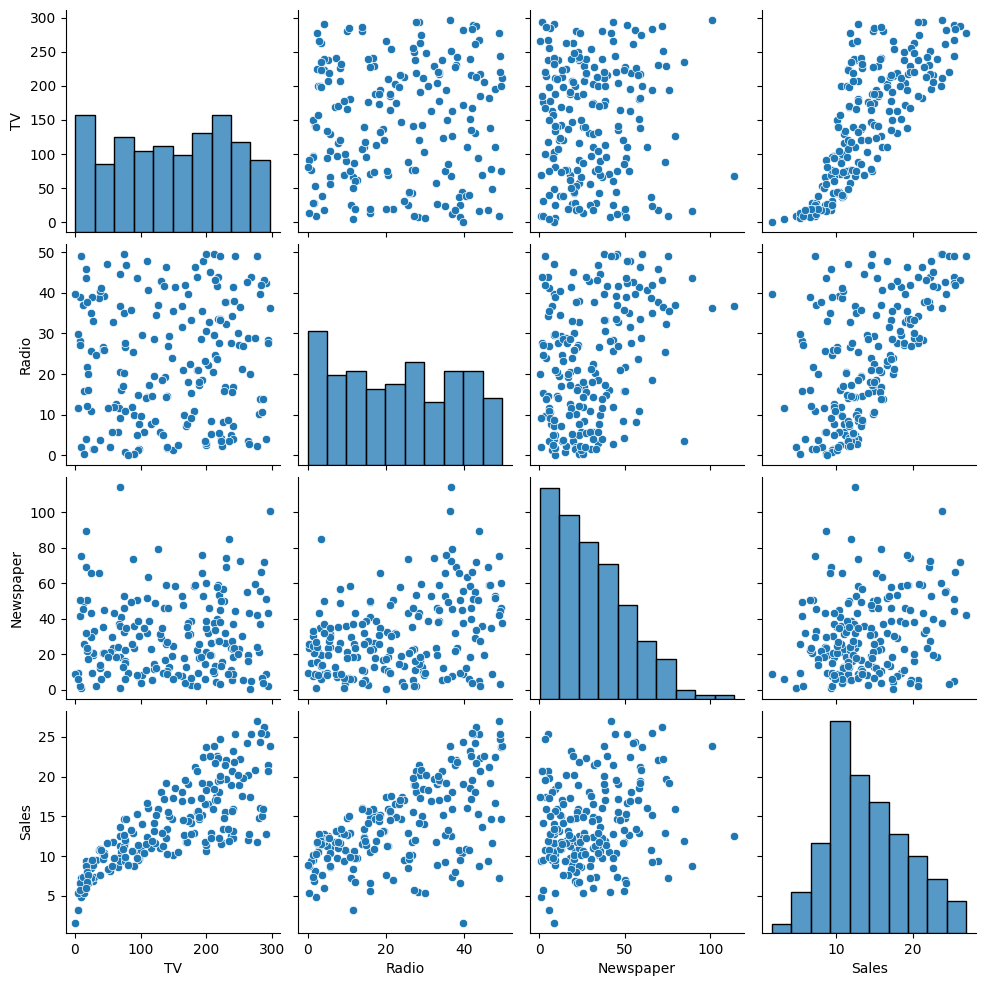

In [64]:
# EDA to get an idea of marginal relationships

import seaborn as sns

sns.pairplot(advertising, diag_kws={'bins': 10})
plt.show()

In [65]:
# personally I prefer data in a numpy format since any library can use numpy data structures
# this isnt strictly necessary

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

Now lets create the regression object

In [66]:
lm = LinearRegression()

Fit it

In [67]:
lm.fit(x_train, y_train)

LinearRegression()

make predictions

In [68]:
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

Evaluate

In [69]:
print("Train")
print('MSE -', np.mean((y_train - yhat_train)**2))
print('R2 - ', lm.score(x_train, y_train))

print("\n")
print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))

Train
MSE - 2.754315563950069
R2 -  0.8957638744443468


Test
MSE - 3.1308020912380483
R2 -  0.9046924770871361


There is some deterioration between train and test as anticipated
- MSE increased (bad)
- R2 decreased (bad)

Overall not so bad? Subjective determination

Lets just say its good enough

## Question 2. Contribution of predictors

How much is each medium contributing towards the total sales? I.e. what is the effect of each medium if you hold the others constant?

In linear regression this is easy to determine
 - just look at the coefficients
 - thats literally their meaning
 - wont be so easy in more complex models


This is why linear regression is an __interpretable__ model. We can see exactly how each feature is used, and its relative importance, by simply looking at the coefficients. We can directly interpret coefficients as the estimted partial contribution of that feature to the target.

In [70]:
# access the coefficients through the coef_ attribute
lm.coef_

array([[0.0451046 , 0.18511831, 0.00181341]])

In [71]:
# access the intercept through the intercept_ attribute
lm.intercept_

array([3.05174081])

In [72]:
beta = np.round(lm.coef_[0], 3)

print('Intercept', np.round(lm.intercept_[0], 2))
print('TV \t', beta[0])
print('Radio \t', beta[1])
print('News \t', beta[2])

Intercept 3.05
TV 	 0.045
Radio 	 0.185
News 	 0.002


Each coefficient here is the __partial contribution__ of that predictor towards the total
 - If we hold Radio and Newspaper spending fixed, then every dollar we spend on TV is associated with an extra 0.045 extra dollars in sales

 - If we hold TV and Newspaper spending fixed, then every dollar we spend on Radio is associated with an extra 0.197 extra dollars in sales

 - If we hold TV and Radio spending fixed, then every dollar we spend on Newspaper is associated with an extra 0.006 extra dollars in sales


This does not tell us anything about the __mechanism__ that causes these relationships to hold
 - All we know is that they do hold
 - This is where A/B testing and randomized experiments come in to further investigate the causal nature of these relationships

Without doing any testing we can get an idea of which features are important
- Clearly Radio spending is associated with a large expected increase in sales
- Newspaper not so much...

## Question 3. Significant contributions

Now, we want to further investigate which of these relationships (between features and the target) are statistically significant.

- Which relationships can be distinguished from 0
- Test $\beta_i = 0$ vs $\beta_i \neq 0$

To assess significance we're forced to introduce yet another library `statsmodels`

Interface is similar enough to `sklearn`

In [74]:
import statsmodels.api as sm

x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     504.2
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           3.88e-86
Time:                        12:51:37   Log-Likelihood:                -346.59
No. Observations:                 180   AIC:                             701.2
Df Residuals:                     176   BIC:                             714.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0517      0.326      9.366      0.0

Theres an enormous amount of output here. All we really care about is the table in the middle. We either want to look at
 - `t` and `P>|t|`
 - `[0.025` and `0.975]`

`t` and `P>|t|`
 - t statistic and associated p-value for a t-test if `coef  = 0` or not
 - looking for `P>|t|` to be under 0.05

`[0.025` and `0.975]`
 - 95\% confidence interval for `coef`
 - Same as a t-test at signficance level $\alpha = 0.05$
 - looking for these two numbers to not contain 0

__Conclusion__: Newspaper is not significant given TV and Radio

__Not the conclusion__: Newspaper isnt not significant. Newspaper isnt useful

## Feedback into predictive models

We go through the above analysis and find that newspaper is not a significant factor given TV and Radio spending. Fair enough.

Lets rebuild the predictive model __without newspaper__

In [75]:
x = advertising.iloc[:,0:2]
y = advertising.iloc[:,3:4]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

In [76]:
print("Train")
print('MSE -', np.mean((y_train - yhat_train)**2))
print('R2 - ', lm.score(x_train, y_train))

print("\n")
print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))

Train
MSE - 2.7556462978110265
R2 -  0.8957135132788988


Test
MSE - 3.0891353839787694
R2 -  0.9059608902736263


Compared to the full model that includes TV, Radio, and Newspaper. A model with only TV and Radio...

Training
 - MSE went up (bad)
 - R2 went down (bad)

Testing
- MSE went down (good!)
- R2 went up (good!)


As was foretold, our training metrics will deteriorate when we use less information (dropping newspaper).

However, our testing metrics are not gauranteed to suffer and can in fact improve by excluding largely irrelevant information

# Interaction terms

__Interaction__: An interaction occurs when an independent variable has a different effect on the outcome depending on the values of another independent variable.

Iteraction terms measure how the response $Y$ is affected by two variables simultaneously

Can create interaction terms by simply multiplying covariates together. For example if we have two variables $X_1$ and $X_2$. We can measure the individual contributions of $X_1$ and $X_2$ and interaction contribuion $X_1 X_2$ as

$$
f(x) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2
$$

### How to understand this

Lets say we fix $X_2$, how does $X_1$ relate to $Y$?

In standard multiple linear regression

$$
f(x) = \underbrace{\beta_0}_{constant} + \beta_1 X_1 + \underbrace{\beta_2 X_2}_{constant}
$$

So $X_1$'s relationship with $Y$ is solely determined by $\beta_1$ and it doesnt matter what value we fixed for $X_2$.

If we have an interaction term then

$$
f(x) = \underbrace{\beta_0}_{constant} + \beta_1 X_1 + \underbrace{\beta_2 X_2}_{constant} + \underbrace{\beta_3 X_2}_{constant} X_1
$$

Now $X_1$'s relationship to $Y$ depends on $\beta_1$ and $\beta_3 X_2$, so it matters what value we fixed for $X_2$.

Interpretation becomes a little more tricky. Now there is no longer a singular "effect" of $X_1$. The contribution of $X_1$ is tied to the value of $X_2$, i.e. the way $X_1$ influences $Y$ will depend on $X_2$.

Example on dose-repsonse curves illustrates this further (next section)

## Advertising with interactions

Lets modify our model for sales to include all three pairwise interactions. That is we will expand the capacity of $\mathcal{F}$ so that now

$$
f(x) = \beta_0 + \beta_{TV} X_{TV} + \beta_{Radio} X_{Radio} + \beta_{News} X_{News} +  \\ \beta_{4} X_{TV}X_{Radio} + \beta_{5} X_{TV}X_{News}  + \beta_{6} X_{Radio}X_{News}
$$

What can we expect?

1. More covariates means more information to predict $Y$, meaning hopefully __improved prediction__.

2. Investigate the interactive effects between different sources of spending

In [77]:
x = np.array(advertising.iloc[:,0:3])
x = np.hstack([x,
               (x[:,0]*x[:,1]).reshape(-1, 1),
               (x[:,0]*x[:,2]).reshape(-1, 1),
               (x[:,1]*x[:,2]).reshape(-1, 1)])
y = advertising.iloc[:,3:4]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

In [78]:
print("Train")
print('MSE -', np.mean((y_train - yhat_train)**2))
print('R2 - ', lm.score(x_train, y_train))

print("\n")
print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))

Train
MSE - 0.850387084547614
R2 -  0.9680853921889113


Test
MSE - 1.0497327461429702
R2 -  0.9593268168435899


- Massively improved MSE (previously around 3.7 on test)
- Massively improved R2 (previously around 0.85 on test)

By including the interaction terms we have greatly improved the predictive performance of our model. This is not always guaranteed to happen, generalization will only improve if the interactive terms are infact helpful for prediction.

In [79]:
import statsmodels.api as sm

x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     642.1
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           2.00e-92
Time:                        12:51:37   Log-Likelihood:                -179.28
No. Observations:                 134   AIC:                             372.6
Df Residuals:                     127   BIC:                             392.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9369      0.408     14.559      0.0

Significance and prediction do not have to align

- metrics on test and train improved a lot
- none of the new features (except X4) were significant

Have to consider statistical significance vs "predictive importance".
- Statistical significance means we can detect a non-zero relationship between the partial contribution of $X_i$ on $Y$
- Predictive importance means including this features decreases our loss on test

# Categorical features

We have been looking entirely at features that are continuous
 - TV spending, Radio spending, Newspaper spending are all (positive) real numbers
 - These features can be an infinite number of values

But information can be contained in categorical data as well
 - Gender, Marital Status, Ethnicity, etc.
 - Can tell us about the behavior of groups


According to Wikipedia:

"In statistics, a __categorical variable__ (also called __qualitative__ variable) is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property"
- e.x. a variable called `marital_status` thats just `yes` or `no`
- e.x. a variables called `number_accidents` thats just `1, 2, 3, or 4+`

https://book.stat420.org/categorical-predictors-and-interactions.html


For categorical features we will first look at the `credit` dataset
- This dataset records underwriting features for each person along with their credit rating.
- Often these features categorical in nature -- Gender, Student status, etc.

In [80]:
credit = pd.read_csv('Credit.csv', usecols = np.arange(1, 11))
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,104.593,7075,514,4,71,11,Male,No,No,Asian
3,148.924,9504,681,3,36,11,Female,No,No,Asian
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian


- Income, Limit, and Rating can be treated as __continuous__
- Education, Gender, Student, Marries, Ethnicity are __categorical__
- Cards and Age are __ordinal__
 - they have a meanginful order, can treat as continuous or categorical
 - If lots of categories relative to number of obs then treat as continuous
 - Otherwise categorical

## Predicting your credit rating

Build a simple model to predict credit rating from your underwriting features

real world note: if you use income to predict someones insurance risk you'll recieve a lawsuit from the Department of Insurance faster than your model takes to run.

In [81]:
x = credit.drop('Rating', axis=1)
y = credit.loc[:,['Rating']]

In [82]:
x.head()

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,14.891,3606,2,34,11,Male,No,Yes,Caucasian
1,106.025,6645,3,82,15,Female,Yes,Yes,Asian
2,104.593,7075,4,71,11,Male,No,No,Asian
3,148.924,9504,3,36,11,Female,No,No,Asian
4,55.882,4897,2,68,16,Male,No,Yes,Caucasian


In [83]:
y.head()

,Rating
0,283
1,483
2,514
3,681
4,357


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lm = LinearRegression()
lm.fit(x_train, y_train)

ValueError: could not convert string to float: ' Male'

- So we cant just throw categorical data into a regression

- Python has no idea what to do with strings like `' Male'`

### Encoding categories

We have encode categories into numerical variables

Naive encoding scheme for categorical variables is __one-hot encoding__
 - Given a categorical feature with $k$ categories
 - Creates a new column (feature) for each value of a categorical variable
  - Creates $k$ "dummy" features
 - Each dummary features records whether that observation was in that category (1) or not (0)

__example__: Suppose we have a gender variable taking values `Male`, `Female`, and `Other`

In [85]:
from sklearn.preprocessing import OneHotEncoder

X = np.array([['Male'], ['Female'], ['Other']])

print('Original - One feature recording three categories')
original_x = pd.DataFrame(X, columns=['Gender'])
original_x
print(original_x)

enc = OneHotEncoder()
enc.fit(X)

encoded_x = enc.transform(X).toarray()
encoded_x = pd.DataFrame(encoded_x, columns=['is_female', 'is_male', 'is_other'])

print('\n')
print('Encoded - three features recording one category each')
print(encoded_x)

Original - One feature recording three categories
   Gender
0    Male
1  Female
2   Other


Encoded - three features recording one category each
   is_female  is_male  is_other
0        0.0      1.0       0.0
1        1.0      0.0       0.0
2        0.0      0.0       1.0


In [86]:
X = np.array([['Other'],
              ['Female'],
              ['Male'],
              ['Female'],
              ['Male'],
              ['Other'],
              ['Male'],
              ['Male'],
              ['Female'],
              ['Female'],
              ['Male'],
              ['Female']])

print('Original - One feature recording three categories')
original_x = pd.DataFrame(X, columns=['Gender'])
original_x
print(original_x)

enc = OneHotEncoder()
enc.fit(X)

encoded_x = enc.transform(X).toarray()
encoded_x = pd.DataFrame(encoded_x, columns=['is_female', 'is_male', 'is_other'])

print('\n')
print('Encoded - three features recording one category each')
print(encoded_x)

Original - One feature recording three categories
    Gender
0    Other
1   Female
2     Male
3   Female
4     Male
5    Other
6     Male
7     Male
8   Female
9   Female
10    Male
11  Female


Encoded - three features recording one category each
    is_female  is_male  is_other
0         0.0      0.0       1.0
1         1.0      0.0       0.0
2         0.0      1.0       0.0
3         1.0      0.0       0.0
4         0.0      1.0       0.0
5         0.0      0.0       1.0
6         0.0      1.0       0.0
7         0.0      1.0       0.0
8         1.0      0.0       0.0
9         1.0      0.0       0.0
10        0.0      1.0       0.0
11        1.0      0.0       0.0


## Categorical regression

Suppose we want to predict some target $Y$, such as credit rating. If we __only__ use the gender variable then our model is
$$
Y = \beta_0 + \beta_1 X_{male} + \beta_2 X_{female} + \beta_3 X_{other} + \epsilon
$$

Where

$$ \beta_i X_i =
\begin{cases}
       \beta_i &\quad\text{if } X_i = 1 \\
       0 &\quad\text{if } X_i = 0 \\
\end{cases}
$$

Interpretation
 - There is a global intercept
 - Each category has its own intercept
 - There are no slopes


Prediction

$$ \hat Y =
\begin{cases}
       \hat \beta_0 + \hat \beta_1 &\quad\text{if } X_{male} = 1 \\
       \hat \beta_0 + \hat \beta_2 &\quad\text{if } X_{female} = 1 \\
       \hat \beta_0 + \hat \beta_3 &\quad\text{if } X_{other} = 1 \\
\end{cases}
$$

Prediction reveals the __flaw__ with one hot encoding in a model with an intercept

- There are an infinite number of equally valid $\beta_0, \beta_1, \beta_2, \beta_3$

__example__:

- Define $\beta^*_0 = (\beta_0 + 1)$, $\beta^*_1 = (\beta_1 - 1)$ , $\beta^*_2 = (\beta_2 - 1)$, $\beta^*_3 = (\beta_3 - 1)$

- Predictions are identical to $\beta_0$, $\beta_1$ , $\beta_2$, $\beta_3$
$$\hat \beta_0 + \hat \beta_1 = (\hat \beta_0 + 1) + (\hat \beta_1 - 1)$$
$$\hat \beta_0 + \hat \beta_2 = (\hat \beta_0 + 1) + (\hat \beta_2 - 1)$$
$$\hat \beta_0 + \hat \beta_3 = (\hat \beta_0 + 1) + (\hat \beta_3 - 1)$$

- Since $\beta_0$, $\beta_1$ , $\beta_2$, $\beta_3$ and $\beta^*_0$, $\beta^*_1$ , $\beta^*_2$, $\beta^*_3$ lead to the exact same predictions, they have the exact same loss

- There is no way to __identify__ which are the "real" coefficients



This nonidentifiability issues arrises because of an issue called __collinearity__

If we encode all categories as a unique column then the encoded variables and the intercept are perfectly linearly dependent with the intercept
 - i.e. we can write the intercept as a linear combination of the encoded variables
 - No longer a unique solumn -- $\beta$'s not unique!
 - Thats bad for interpretation. How do we talk about "effects" if there are infinitely many equally valid $\hat \beta$??


In [87]:
encoded_x = enc.transform(X).toarray()
encoded_x = pd.DataFrame(encoded_x, columns=['is_female', 'is_male', 'is_other'])
encoded_x[['intercept']] = 1.0
encoded_x

,is_female,is_male,is_other,intercept
0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0
5,0.0,0.0,1.0,1.0
6,0.0,1.0,0.0,1.0
7,0.0,1.0,0.0,1.0
8,1.0,0.0,0.0,1.0
9,1.0,0.0,0.0,1.0


Instead we can use __dummy__ encoding.

Basically the same as one hot encoding except that we drop a category.
 - $k$ categories becomes $k-1$ new dummy variables

In [88]:
enc = OneHotEncoder(drop = 'first')
X = np.array([['Male'], ['Female'], ['Other']])
enc.fit(X)

print('Original - One feature recording three categories')
print(X)

print('\n')
print('Encoded - two feature recording membership in each category')
print(enc.transform(X).toarray())

Original - One feature recording three categories
[['Male']
 ['Female']
 ['Other']]


Encoded - two feature recording membership in each category
[[1. 0.]
 [0. 0.]
 [0. 1.]]


In [89]:
encoded_x = enc.transform(X).toarray()
encoded_x = pd.DataFrame(encoded_x, columns=['is_male', 'is_other'])
encoded_x[['intercept']] = 1.0
encoded_x

,is_male,is_other,intercept
0,1.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,1.0


Now our model is

$$
Y = \beta_0 + \beta_1 X_{male} + \beta_2 X_{other} + \epsilon
$$

Where

$$ \beta_i X_i =
\begin{cases}
       \beta_i &\quad\text{if } X_i = 1 \\
       0 &\quad\text{if } X_i = 0 \\
\end{cases}
$$

Interpretation
- $\hat \beta_0$ is the mean of females
- $\hat \beta_1$ is the mean __difference__ between males and females
- $\hat \beta_2$ is the mean __difference__ between other and females

When we dummy encode a categorical variable
 - one category becomes the baseline (females)
 - all other categorie's $\beta$'s measure differences from the baseline


### Credit example

Lets return to the credit example and encode the categorical variables. We will drop the first category of each categorical variable for interpretation, though this will not impact the predictive skill of the model

In [90]:
x = credit.drop('Rating', axis=1)
y = credit.loc[:,'Rating']

# Education	Gender Student Married Ethnicity
enc = OneHotEncoder(drop = 'first')
enc.fit(x.loc[:,['Education', 'Gender', 'Student', 'Married', 'Ethnicity']])

x_cat = enc.transform(x.loc[:,['Education', 'Gender', 'Student', 'Married', 'Ethnicity']]).toarray()
x_cat.shape

(400, 20)

In [91]:
## append categorical features back on
x_cont = x.loc[:, ['Income', 'Limit',	'Cards', 'Age']]
x = np.hstack([x_cont, x_cat])
x.shape

(400, 24)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

In [93]:
print("Train")
print('MSE -', np.mean((y_train - yhat_train)**2))
print('R2 - ', lm.score(x_train, y_train))

print("\n")
print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))

Train
MSE - 101.06577002220924
R2 -  0.9959920003783244


Test
MSE - 105.51212746646162
R2 -  0.9949995599994558


- In an absolute sense there is likley some room to improve the model (reduce MSE)
- However, we have explained about 99% of the variation in $Rating$

In [94]:
import statsmodels.api as sm

x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2636.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):          3.79e-278
Time:                        12:52:06   Log-Likelihood:                -998.79
No. Observations:                 268   AIC:                             2046.
Df Residuals:                     244   BIC:                             2132.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7622      3.214      7.706      0.0

We can still interpret the significance of features
- Remember that significance is relative to other features in the model
- I.e. If we drop or add more features then significance will likely change

Interpreting categorical features (with $k$ categories) is a little more tricky
- Each categorical feature is split into $k-1$ features
- Each of these "dummy" features gets its own t-test (sklearn doenst know they are related)
- Can use F-test to determine significance of groups of features
- Not covering that in this class. Please take a regression class.


### Auto MPG example

Lets look at a simpler categorical example to see what categorical data can tell us and how to interpret the model

We import the auto-mpg dataset that records
1. MPG
2. Features of the car
3. Origin of the car



In [95]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
mtcars = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

## create new variable "Domestic"
mtcars[['Domestic']] = 1.0 * (mtcars[['Origin']] == 1)

# drop rows with 3 or 5 cylinders
mtcars = mtcars.loc[mtcars['Cylinders'].isin([4.0, 6.0, 8.0])]

In [96]:
mtcars.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Domestic
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,1.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,1.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,1.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,1.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,1.0


Lets first consider a model MPG as a function of displacement ($\approx$ engine size)

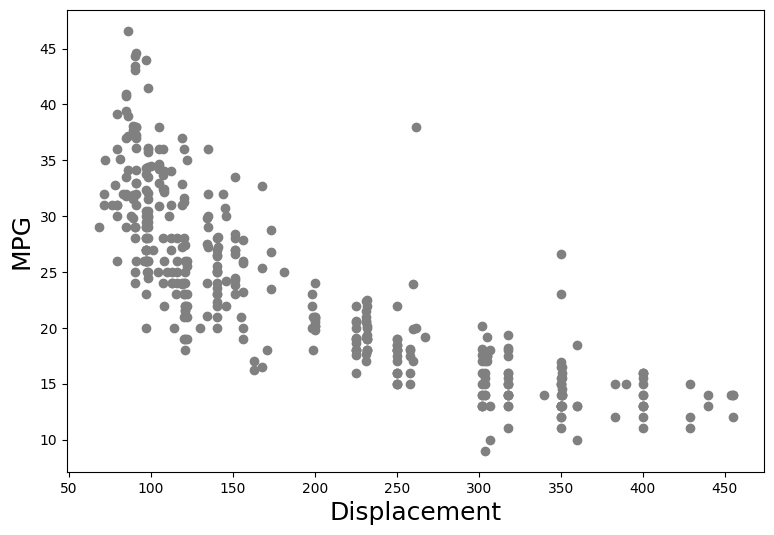

In [97]:
plt.figure(figsize = (9, 6))
plt.scatter(mtcars['Displacement'], mtcars['MPG'], c = 'grey')
plt.xlabel('Displacement', fontsize = 18)
plt.ylabel('MPG', fontsize = 18)
plt.show()

- Looks roughly linear so we procede with a linear model

In [98]:
x = mtcars[['Displacement']]
y = mtcars['MPG']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_test = lm.predict(x_test)

print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))


Test
MSE - 22.015029030596242
R2 -  0.5963630705266776


- Could be better

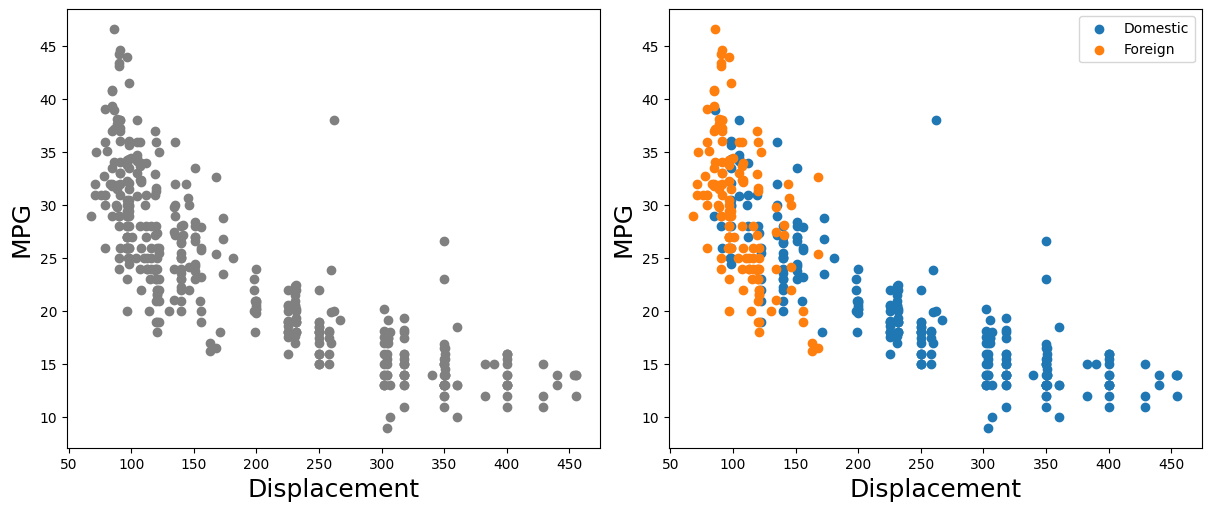

In [99]:
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (12, 5))

ax[0].scatter(mtcars['Displacement'], mtcars['MPG'], c = 'grey')
ax[0].set_xlabel('Displacement', fontsize = 18)
ax[0].set_ylabel('MPG', fontsize = 18)

cars_usa = mtcars.loc[mtcars['Domestic'] == 1.0]
cars_etc = mtcars.loc[mtcars['Domestic'] == 0.0]
ax[1].scatter(cars_usa['Displacement'], cars_usa['MPG'], label = 'Domestic')
ax[1].scatter(cars_etc['Displacement'], cars_etc['MPG'], label = 'Foreign')
ax[1].set_xlabel('Displacement', fontsize = 18)
ax[1].set_ylabel('MPG', fontsize = 18)

plt.legend()
plt.show()

- Looks like the behavior and range between Foreign and Domestic cars is different

- Good candidate for inclusion!

In [100]:
x = mtcars.loc[:,['Displacement', 'Domestic']]
y = mtcars['MPG']

# Domestic is already "encoded" since its already binary
# 1 = USA
# 0 = OTHER
# so we dont need to explicitly recode it with OneHotEncoder()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_test = lm.predict(x_test)

print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))


Test
MSE - 21.555703101660203
R2 -  0.6047846314215352


- Why didnt that help? Aren't they different???

In [101]:
alpha = lm.intercept_
beta = lm.coef_
alpha, beta

(np.float64(36.426322304405964), array([-0.0614519 , -0.97162632]))

- The first beta coefficient is miniscule, indicating that the difference between the intercepts (foreign vs domestic) is miniscule

- Lets look at the prediction functions for foreign and domestic cars

In [102]:
usa_pred = (alpha + beta[1]) + beta[0] * mtcars[['Displacement']]
other_pred = alpha + beta[0] * mtcars[['Displacement']]

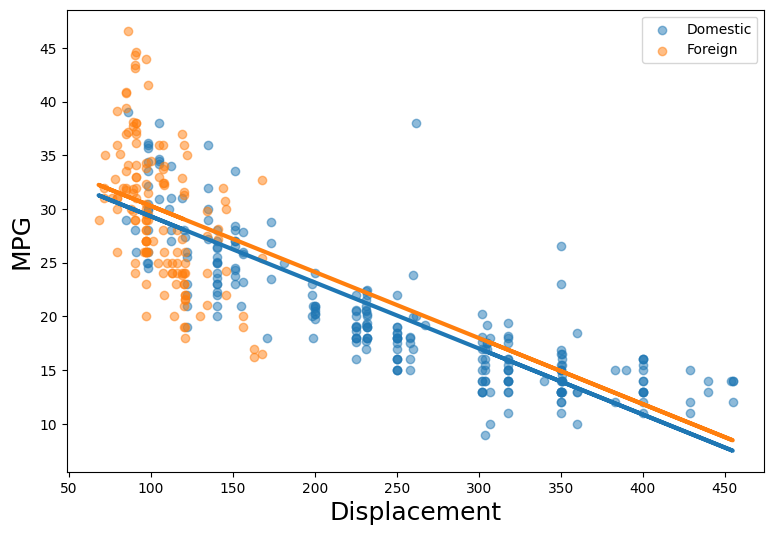

In [103]:
plt.figure(figsize = (9, 6))

cars_usa = mtcars.loc[mtcars['Domestic'] == 1.0]
cars_etc = mtcars.loc[mtcars['Domestic'] == 0.0]
plt.scatter(cars_usa['Displacement'], cars_usa['MPG'], alpha = 0.5, label = 'Domestic')
plt.scatter(cars_etc['Displacement'], cars_etc['MPG'], alpha = 0.5, label = 'Foreign')
plt.plot(mtcars[['Displacement']], usa_pred, linewidth = 3)
plt.plot(mtcars[['Displacement']], other_pred, linewidth = 3)

plt.xlabel('Displacement', fontsize = 18)
plt.ylabel('MPG', fontsize = 18)

plt.legend()
plt.show()

- The gap between the lines is the coefficient for `Domestic`
- Clearly this hasnt really represented the differences between the two sources of cars.
- The plot shows that equal slopes but different intercepts was not sufficient

- All we can take away from this plot is that Domestic cars have $0.06$ lower MPG on average

Instead we would like to __vary the slopes by category__
 - Seems like Foreign cars have a steep slope with respect to displacement
 - Domestic cars have a shallow slope

## Interactions revisited with categorical features

Often, categorical features are good candidates for interaction terms
 - E.x. We think men and women may respond to a drug treatment differently
 - Foreign and Domestic cars vary in their MPG differenly depending on displacement


When we encode categorical features they become 1's and 0's. There is no concept of a `slope` for a categorical feature.

For a binary $X$

$$ \beta X =
\begin{cases}
       \beta &\quad\text{if } X = 1 \\
       0 &\quad\text{if } X = 0 \\
\end{cases}
$$



Interaction terms allow us to give categories slopes.

Suppose we have two variables $X_1$ and $X_2$ where $X_1$ is categorical (two categories) and $X_2$ is continuous. We want to predict another variable $Y$ and create the following regression model

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 +\epsilon
$$

The term $\beta_2 X_2$ is the same as always, i.e. the direct partial effect of $X_2$ on $Y$.

The categorical terms can be writen as
$$ \beta_1 X_1 =
\begin{cases}
       \beta &\quad\text{if } X_1 = 1 \\
       0 &\quad\text{if } X_1 = 0 \\
\end{cases}
$$

and

$$ \beta_3 X_1 X_2 =
\begin{cases}
       \beta_3 X_2 &\quad\text{if } X = 1 \\
       0 &\quad\text{if } X = 0 \\
\end{cases}
$$

This reveals that our original model actually contains __two__ models. One for the case when $X_1 = 0$ and one for the case when $X_1 = 1$.

When $X_1 = 0$ we model $Y$ as
$$
Y = \beta_0 + \beta_2 X_2 + \epsilon
$$

When $X_1 = 1$ we model $Y$ as
$$
\begin{align}
  Y &= \beta_0 + \beta_1 + \beta_2 X_2 + \beta_3 X_2  + \epsilon \\
    &= (\beta_0 + \beta_1) + (\beta_2 + \beta_3)X_2 + \epsilon \\
    &= \beta_0^* + \beta_2^*X_2 + \epsilon
\end{align}
$$

So for each category in $X_1$ there is a separate model with different intercepts and slopes

In [104]:
x = mtcars.loc[:,['Displacement', 'Domestic']]
x[['Interaction']] = x[['Displacement']].values * x[['Domestic']].values
y = mtcars.loc[:,'MPG']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_test = lm.predict(x_test)

print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))

Test
MSE - 19.521786584108465
R2 -  0.6420756936685433


- Still a modest gain, but definitely larger than last time
- What do our predictions look like?

In [105]:
alpha = lm.intercept_
beta = lm.coef_
alpha, beta

(np.float64(47.50540159916336),
 array([ -0.16686188, -12.69487136,   0.10802196]))

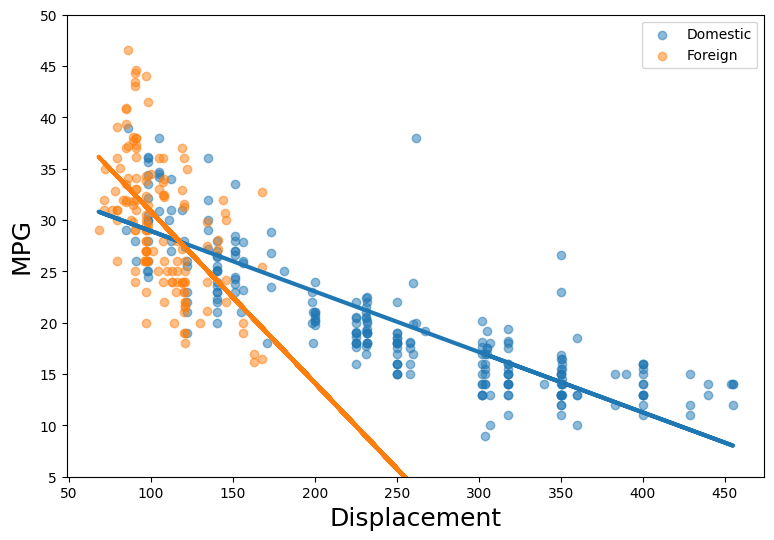

In [106]:
usa_pred = (alpha + beta[1]) + (beta[0] + beta[2]) * mtcars[['Displacement']]
other_pred = alpha + beta[0] * mtcars[['Displacement']]

plt.figure(figsize = (9, 6))

cars_usa = mtcars.loc[mtcars['Domestic'] == 1.0]
cars_etc = mtcars.loc[mtcars['Domestic'] == 0.0]
plt.scatter(cars_usa['Displacement'], cars_usa['MPG'], alpha = 0.5, label = 'Domestic')
plt.scatter(cars_etc['Displacement'], cars_etc['MPG'], alpha = 0.5, label = 'Foreign')
plt.plot(mtcars[['Displacement']], usa_pred, linewidth = 3)
plt.plot(mtcars[['Displacement']], other_pred, linewidth = 3)
plt.ylim(5, 50)

plt.xlabel('Displacement', fontsize = 18)
plt.ylabel('MPG', fontsize = 18)

plt.legend()
plt.show()

## Multi category example



We now model MPG as a function of Displacement and the number of cylinders
 - `Cylinders` can take values 4, 6, and 8

Can we just model it as numerical / continuous?
 - yes, but...

And I quote

"However, that would force the difference in average mpg between 4 and 6 cylinders to be the same as the difference in average mpg between 6 and 8 cylinders. That usually makes sense for a continuous variable, but not for a discrete variable with so few possible values.

In the case of this variable, there is no such thing as a 7-cylinder engine or a 6.23-cylinder engine in personal vehicles.

For these reasons, we will simply consider cyl to be categorical. This is a decision that will commonly need to be made with ordinal variables. Often, with a large number of categories, the decision to treat them as numerical variables is appropriate because, otherwise, a large number of dummy variables are then needed to represent these variables."

https://book.stat420.org/categorical-predictors-and-interactions.html

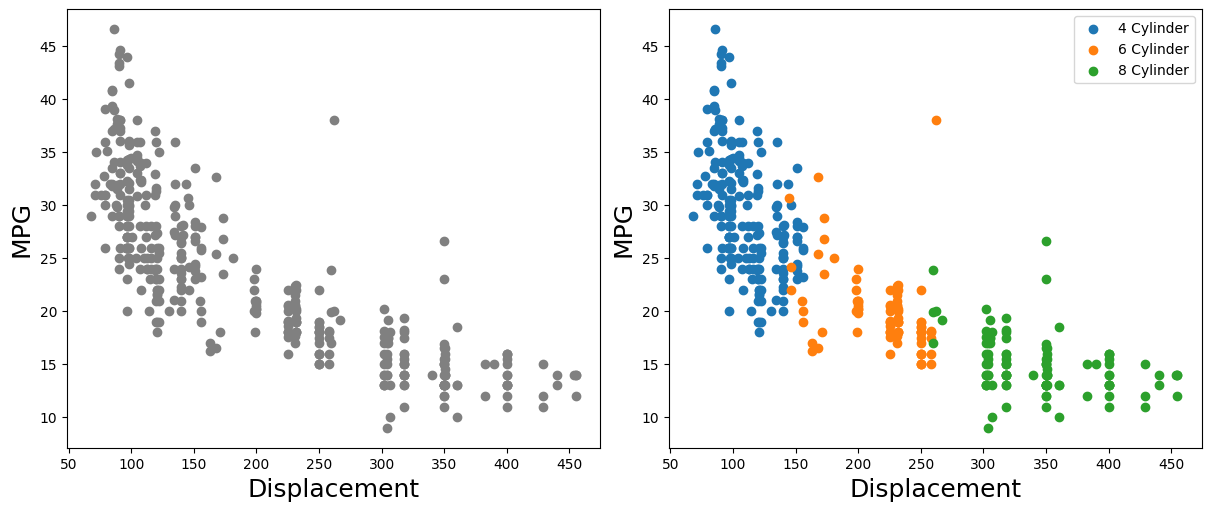

In [107]:
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (12, 5))

ax[0].scatter(mtcars['Displacement'], mtcars['MPG'], c = 'grey')
ax[0].set_xlabel('Displacement', fontsize = 18)
ax[0].set_ylabel('MPG', fontsize = 18)

cyl4 = mtcars.loc[mtcars['Cylinders'] == 4.0]
cyl6 = mtcars.loc[mtcars['Cylinders'] == 6.0]
cyl8 = mtcars.loc[mtcars['Cylinders'] == 8.0]

ax[1].scatter(cyl4['Displacement'], cyl4['MPG'], label = '4 Cylinder')
ax[1].scatter(cyl6['Displacement'], cyl6['MPG'], label = '6 Cylinder')
ax[1].scatter(cyl8['Displacement'], cyl8['MPG'], label = '8 Cylinder')
ax[1].set_xlabel('Displacement', fontsize = 18)
ax[1].set_ylabel('MPG', fontsize = 18)

plt.legend()
plt.show()

In [108]:
x_cont = mtcars.loc[:,['Displacement']]
x_cont = np.array(x_cont)

enc = OneHotEncoder(drop = 'first')
x_cat = mtcars.loc[:,['Cylinders']]
x_cat = enc.fit_transform(x_cat).toarray()

x = np.hstack([x_cont, x_cat])
y = mtcars.loc[:,'MPG']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_test = lm.predict(x_test)

print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))

Test
MSE - 21.12743995839724
R2 -  0.6126366683147417


In [109]:
alpha = lm.intercept_
beta = lm.coef_
alpha, beta

(np.float64(35.32132526377122), array([-0.04968289, -4.32366182, -3.42997267]))

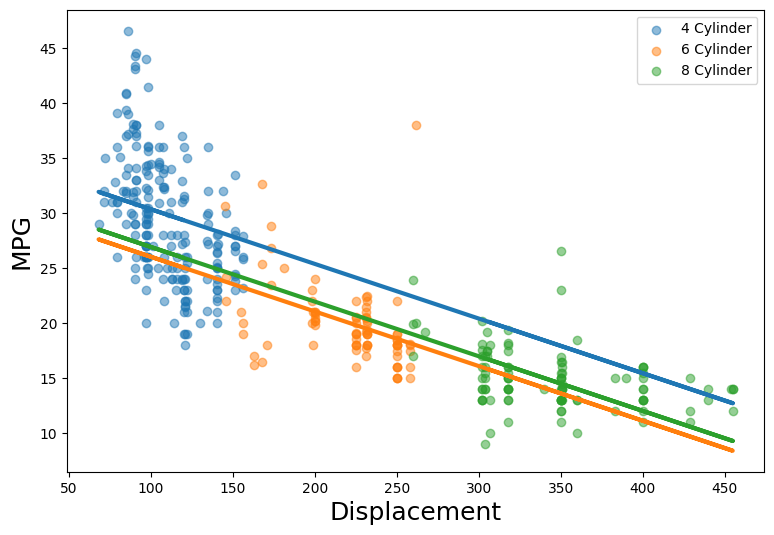

In [110]:

cyl4_pred = alpha + beta[0] * mtcars[['Displacement']]
cyl6_pred = (alpha + beta[1]) + beta[0] * mtcars[['Displacement']]
cyl8_pred = (alpha + beta[2]) + beta[0] * mtcars[['Displacement']]

cyl4 = mtcars.loc[mtcars['Cylinders'] == 4.0]
cyl6 = mtcars.loc[mtcars['Cylinders'] == 6.0]
cyl8 = mtcars.loc[mtcars['Cylinders'] == 8.0]

plt.figure(figsize = (9, 6))

plt.scatter(cyl4['Displacement'], cyl4['MPG'], alpha = 0.5, label = '4 Cylinder')
plt.scatter(cyl6['Displacement'], cyl6['MPG'], alpha = 0.5, label = '6 Cylinder')
plt.scatter(cyl8['Displacement'], cyl8['MPG'], alpha = 0.5, label = '8 Cylinder')

plt.plot(mtcars[['Displacement']], cyl4_pred, linewidth = 3)
plt.plot(mtcars[['Displacement']], cyl6_pred, linewidth = 3)
plt.plot(mtcars[['Displacement']], cyl8_pred, linewidth = 3)


plt.xlabel('Displacement', fontsize = 18)
plt.ylabel('MPG', fontsize = 18)

plt.legend()
plt.show()

Does this model really represent the data?

What about the non-intuitive result that 6 cylinders have lower MPG than 8 cylinders?
 - Despite the plot showing the green mostly below the orange
 - Artifact of forcing all three categories to share a slope
 - Could we do better by interacting cylinders with displacement?

In [111]:
x_cont = mtcars.loc[:,['Displacement']]
x_cont = np.array(x_cont)

enc = OneHotEncoder(drop = 'first')
x_cat = mtcars.loc[:,['Cylinders']]
x_cat = enc.fit_transform(x_cat).toarray()

x_int = x_cont * x_cat

x = np.hstack([x_cont, x_cat, x_int])
y = mtcars.loc[:,'MPG']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_test = lm.predict(x_test)

print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))

Test
MSE - 19.070659252888444
R2 -  0.6503469364873502


In [112]:
alpha = lm.intercept_
beta = lm.coef_
alpha, beta

(np.float64(43.48209685334797),
 array([ -0.12367916, -15.9210599 , -21.89909575,   0.08952152,
          0.10408296]))

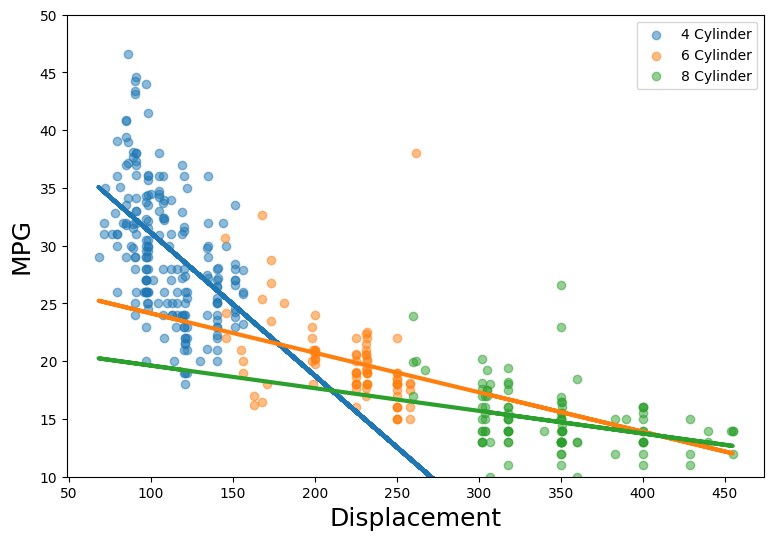

In [113]:
cyl4_pred = alpha + beta[0] * mtcars[['Displacement']]
cyl6_pred = (alpha + beta[1]) + (beta[0] + beta[3]) * mtcars[['Displacement']]
cyl8_pred = (alpha + beta[2]) + (beta[0] + beta[4]) * mtcars[['Displacement']]

cyl4 = mtcars.loc[mtcars['Cylinders'] == 4.0]
cyl6 = mtcars.loc[mtcars['Cylinders'] == 6.0]
cyl8 = mtcars.loc[mtcars['Cylinders'] == 8.0]

plt.figure(figsize = (9, 6))

plt.scatter(cyl4['Displacement'], cyl4['MPG'], alpha = 0.5, label = '4 Cylinder')
plt.scatter(cyl6['Displacement'], cyl6['MPG'], alpha = 0.5, label = '6 Cylinder')
plt.scatter(cyl8['Displacement'], cyl8['MPG'], alpha = 0.5, label = '8 Cylinder')

plt.plot(mtcars[['Displacement']], cyl4_pred, linewidth = 3)
plt.plot(mtcars[['Displacement']], cyl6_pred, linewidth = 3)
plt.plot(mtcars[['Displacement']], cyl8_pred, linewidth = 3)

plt.ylim(10, 50)

plt.xlabel('Displacement', fontsize = 18)
plt.ylabel('MPG', fontsize = 18)

plt.legend()
plt.show()

What we can take away

1. 4 cylinders are the most efficient, but lose efficiently the most quickly with displacement. Displacement has a large effect in 4 cylinder engines.
2. 8 cylinders are the least efficient, but lose efficiently the most slowly with displacement. Displacement has a weak effect in 8 cylinder engines.
3. 6 cylinders is between 4 an 6 in tersm of slope and intercept

In [114]:
import statsmodels.api as sm

x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     148.9
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           1.65e-73
Time:                        12:52:09   Log-Likelihood:                -736.56
No. Observations:                 261   AIC:                             1485.
Df Residuals:                     255   BIC:                             1507.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.4821      1.787     24.327      0.0

# Regularization

To build statistical / ML models we need three things

1. Data -- $X$ and $Y$, observed as $(x_1, y_1),...,(x_n, y_n)$
2. Model family $\mathcal{F}$ -- Possible relationships between $X$ and $Y$
3. Loss function $\mathcal{L}$  -- Finds the best model

I also mentioned a 4th component -- Regularization

Regularization is a way to automatically constrict the size of your model family $\mathcal{F}$ by modifying your loss function $\mathcal{L}$
 - Can keep increasing the number of covariates without so much worry
 - Can even help identify important features



The most common form of regularization is to constrain the loss minimization problem

__Example:__ In the standard simple linear model with MSE loss we find $\hat{\alpha}, \hat{\beta}$ via

$$\hat{\alpha}, \hat{\beta} = \arg\min_{\alpha, \beta \in \mathbb{R}} \frac{1}{n} \sum_{i = 1}^n (y_i - \alpha - \beta x_i)^2$$

What if instead we only allowed solution of the form
$$ \hat{\alpha}, \hat{\beta} = \arg\min_{\alpha, \beta \in \mathbb{R}} \frac{1}{n} \sum_{i = 1}^n (y_i - \alpha - \beta x_i)^2 $$
$$ s.t. \quad \alpha^2 + \beta^2 \leq t, \quad t > 0$$

or solutions like
$$ \hat{\alpha}, \hat{\beta} = \arg\min_{\alpha, \beta \in \mathbb{R}} \frac{1}{n} \sum_{i = 1}^n (y_i - \alpha - \beta x_i)^2 $$
$$ s.t. \quad |\alpha| + |\beta| \leq t, \quad t > 0$$


The first is called __Ridge__ regression
 - All coefficients have be inside a ball centered at 0 with radius $c$
 - effect: all coefficients are "shrunk" towards 0

The second is called __LASSO__
 - All coefficients have be inside a diamond centered at 0 with "radius" $c$
 - effect: all coefficients are "shrunk" towards 0 and some become exactly 0
 - variable selection: anything with a non 0 coefficient

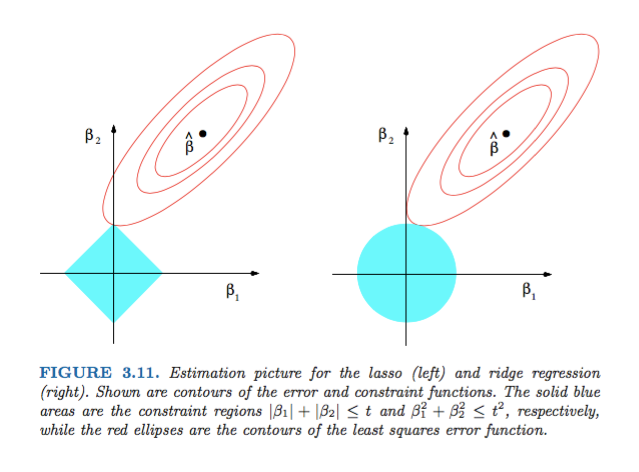

In [115]:
IPython.display.Image('lasso.png')

Often you will see these optimization written in Lagrange multiplier form

Ridge
$$ \hat{\alpha}, \hat{\beta} = \arg\min_{\alpha, \beta \in \mathbb{R}} \frac{1}{n} \sum_{i = 1}^n (y_i - \alpha - \beta x_i)^2 + \lambda (\alpha^2 + \beta^2) $$

LASSO
$$ \hat{\alpha}, \hat{\beta} = \arg\min_{\alpha, \beta \in \mathbb{R}} \frac{1}{n} \sum_{i = 1}^n (y_i - \alpha - \beta x_i)^2 + \lambda (|\alpha| + |\beta|) $$

This leads to the name __penalized regression__ since we have taken the loss
$$ \frac{1}{n} \sum_{i = 1}^n (y_i - \alpha - \beta x_i)^2 $$
and added a "complexity penalty" such as
$$ \lambda (\alpha^2 + \beta^2) \text{  or  } \lambda (|\alpha| + |\beta|) $$


When we minize a penalized loss we force our model to do to things simultaneously
1. Fit the model as well as possible (minimize the loss)
2. Be as simple as possible (minimize the penalty)



$\lambda$ controls the strength of regularization (called $\alpha$ in sklearn)
 - $\lambda = 0$ is ordinary least squares
 - Higher values of $\lambda$ mean more regularization
 - More regularization = worse training error
 - More regularization might mean better testing error (gaurds against overfitting)

You have to select $\lambda$ yourself

### Credit example

Lets return to the credit example and encode the categorical variables. We will drop the first category of each categorical variable for interpretation, though this will not impact the predictive skill of the model

In [116]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [117]:
x = credit.drop('Rating', axis=1)
y = credit.loc[:,'Rating']

# Education	Gender Student Married Ethnicity
enc = OneHotEncoder(drop = 'first')
enc.fit(x.loc[:,['Education', 'Gender', 'Student', 'Married', 'Ethnicity']])

x_cat = enc.transform(x.loc[:,['Education', 'Gender', 'Student', 'Married', 'Ethnicity']]).toarray()

## append categorical features back on
x_cont = x.loc[:, ['Income', 'Limit',	'Cards', 'Age']]
x = np.hstack([x_cont, x_cat])

We compare the ordinary least squares (unpenalized) solution, the LASSO solution, and the Ridge solution

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

lm_ols = LinearRegression()
lm_ols.fit(x_train, y_train)

lm_lasso = Lasso(alpha = 1)
lm_lasso.fit(x_train, y_train)

lm_ridge = Ridge(alpha = 3)
lm_ridge.fit(x_train, y_train)

yhat_train_ols = lm_ols.predict(x_train)
yhat_test_ols = lm_ols.predict(x_test)

yhat_train_lasso = lm_lasso.predict(x_train)
yhat_test_lasso = lm_lasso.predict(x_test)

yhat_train_ridge = lm_ridge.predict(x_train)
yhat_test_ridge = lm_ridge.predict(x_test)

In [119]:
print("Train")
print('MSE OLS -', np.mean((y_train - yhat_train_ols)**2))
print('MSE LASSO -', np.mean((y_train - yhat_train_lasso)**2))
print('MSE RIDGE -', np.mean((y_train - yhat_train_ridge)**2))

print("\n")
print("Test")
print('MSE OLS -', np.mean((y_test - yhat_test_ols)**2))
print('MSE LASSO -', np.mean((y_test - yhat_test_lasso)**2))
print('MSE RIDGE -', np.mean((y_test - yhat_test_ridge)**2))

Train
MSE OLS - 101.06577002220924
MSE LASSO - 109.75394605006495
MSE RIDGE - 101.27512290183995


Test
MSE OLS - 105.51212746646162
MSE LASSO - 94.21566093348348
MSE RIDGE - 103.17614130946309


In [120]:
lm_lasso.coef_

array([ 5.02057959e-02,  6.62929893e-02,  4.45896047e+00, -3.34224063e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [121]:
lm_ridge.coef_

array([ 0.05685996,  0.06620376,  4.94138492, -0.01806565,  1.7540677 ,
        1.9439035 ,  3.55120845,  0.05813921,  3.31171648, -2.07300613,
       -3.47482119, -0.22851028, -2.47015326, -1.95758396, -1.10392395,
        1.67326899, -1.47347209,  0.97697278, -0.48780625,  0.2671582 ,
        1.19023482,  2.418296  , -3.19769643, -1.65026834])

Lets plot the beta coefficients learned by each model

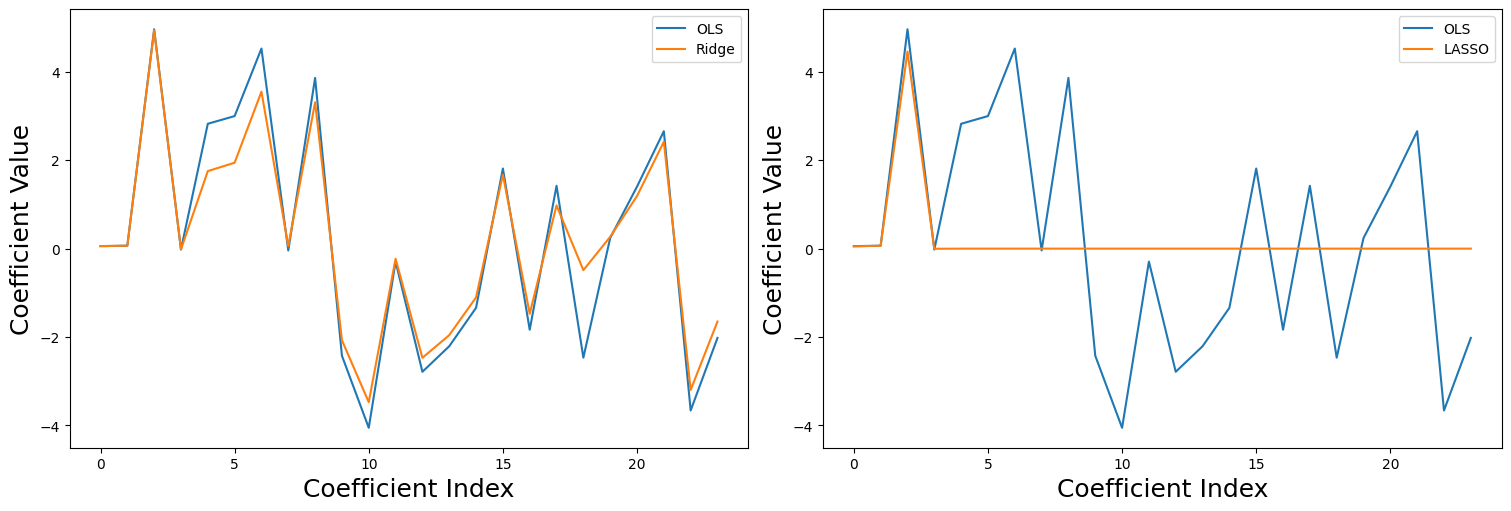

In [122]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize = (15, 5))

ax[0].plot(lm_ols.coef_, label = 'OLS')
ax[0].plot(lm_ridge.coef_, label = 'Ridge')
ax[0].set_xlabel('Coefficient Index', fontsize = 18)
ax[0].set_ylabel('Coefficient Value', fontsize = 18)
ax[0].legend()


ax[1].plot(lm_ols.coef_, label = 'OLS')
ax[1].plot(lm_lasso.coef_, label = 'LASSO')
ax[1].set_xlabel('Coefficient Index', fontsize = 18)
ax[1].set_ylabel('Coefficient Value', fontsize = 18)
ax[1].legend()

plt.show()

- In both cases penalization "shrinks" the coefficients towards 0
- The LASSO shrinks coefficients exactly to 0
 - A variable selection property

### High dimensional example

Because the LASSO can "remove" or "zero out" certain variables, it can be very valuable for selecting variables

Especially when there are a lot of variables.

It even works when there are more variables than observations

__Example__

- We generate a random dataset `x` with 100 observations and 200 features
- The target `y` is only a function of the first 3 features
- What does LASSO select?

In [123]:
np.random.seed(0)
x = np.random.normal(0, 1, [100, 200])
y = 1 + 1 * x[:,0] + 2 * x[:,1] + -2 * x[:,2] + np.random.normal(0, 1, [100])


lm_lasso = Lasso(alpha = 0.35)
lm_lasso.fit(x, y)

lm_ridge = Ridge(alpha = 3)
lm_ridge.fit(x, y)

Ridge(alpha=3)

In [124]:
lm_lasso.coef_

array([ 0.7401481 ,  1.69527069, -1.65542674,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.  

The LASSO decided everything except the first three can be excluded from the model

What did Ridge say?

In [125]:
lm_ridge.coef_

array([ 5.68634623e-01,  9.91975286e-01, -9.87029579e-01, -1.54305365e-01,
       -2.06873911e-01,  5.64321119e-03,  1.58286962e-01,  1.60680162e-01,
        5.30761651e-02, -2.24433291e-01, -9.50434022e-02,  4.72978872e-03,
       -3.52917657e-02, -1.81200313e-01, -5.08901919e-02,  1.40129891e-02,
        4.83165323e-02, -2.49578543e-02,  7.50479156e-02, -2.49748256e-01,
        1.18456299e-02, -2.73910078e-02,  3.13201049e-02, -1.57785341e-01,
        1.49052176e-01,  8.04692340e-03,  6.33575826e-02, -3.59093899e-04,
        1.80591392e-01, -2.17026981e-01,  2.64287056e-02,  3.18789658e-01,
       -1.72228334e-01,  2.11691904e-02,  7.89199026e-02, -1.28922497e-02,
       -2.72293981e-02,  5.15351052e-02,  9.67489598e-02, -5.33407753e-02,
       -9.83931395e-02, -1.81934728e-02,  1.38433455e-01, -1.94760085e-01,
        1.87621925e-02, -2.28614617e-01, -2.13579355e-01,  1.77978072e-01,
        5.49447800e-02,  9.42493314e-03,  1.73107006e-01,  9.76119330e-02,
        3.97914266e-02, -

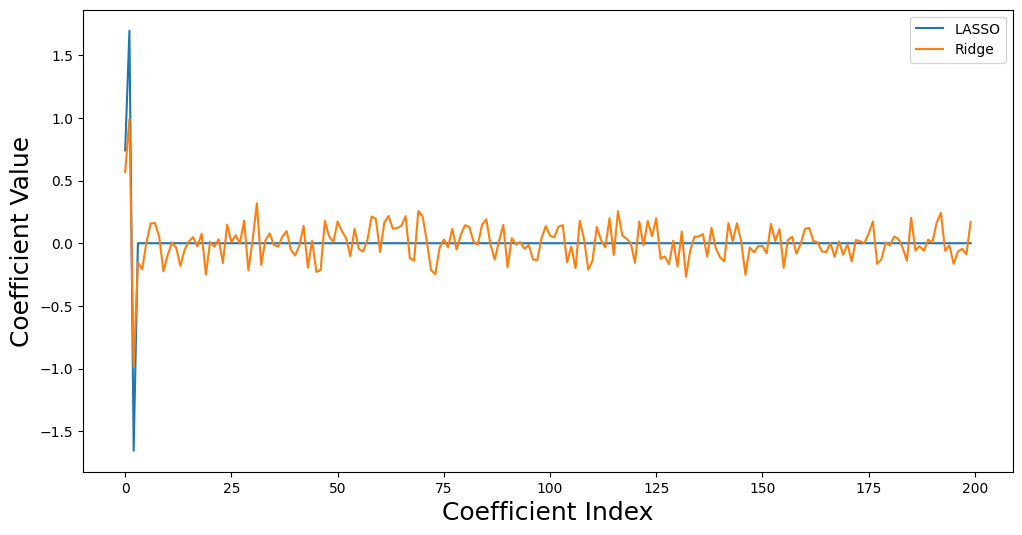

In [126]:
plt.figure(figsize = (12, 6))
plt.plot(lm_lasso.coef_, label = 'LASSO')
plt.plot(lm_ridge.coef_, label = 'Ridge')
plt.xlabel('Coefficient Index', fontsize = 18)
plt.ylabel('Coefficient Value', fontsize = 18)
plt.legend()
plt.show()

Both Ridge and LASSO shrink everything towards 0
- LASSO removes all irrelevant features
- Ridge shrinks ireelevant features closer to 0 than irrelevant ones